In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display, Markdown, HTML

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [29]:
# Create ER Diagram visualization
def create_er_diagram():
    """
    Visual representation of the database schema
    """
    er_diagram = """
    ╔═══════════════════════════════════════════════════════════════════════════════════════════╗
    ║                            🎬 MOVIE TICKET MANAGEMENT SYSTEM - ER DIAGRAM                ║
    ╠═══════════════════════════════════════════════════════════════════════════════════════════╣
    ║                                                                                           ║
    ║  MOVIES (1) ────────────────────── (M) SHOWS (M) ─────────────────────── (1) SCREENS      ║
    ║  ┌─────────────────────┐          ┌─────────────────────┐          ┌─────────────────────┐║
    ║  │ movie_id (PK)       │          │ show_id (PK)        │          │ screen_id (PK)      │║
    ║  │ title               │◄─────────┤ movie_id (FK)       │          │ theatre_id (FK)     │║
    ║  │ genre               │          │ screen_id (FK)      │◄─────────┤ screen_number       │║
    ║  │ duration_minutes    │          │ show_date           │          │ capacity            │║
    ║  │ release_date        │          │ show_time           │          │ screen_type         │║
    ║  │ language            │          │ price               │          │                     │║
    ║  │ director            │          │ available_seats     │          │                     │║
    ║  │ rating              │          │                     │          │                     │║
    ║  │ is_active           │          └─────────────────────┘          └─────────────────────┘║
    ║  └─────────────────────┘                        │                                │        ║
    ║                                                 │                                │        ║
    ║                                                 │ (M)                            │ (1)    ║
    ║                                                 ▼                                │        ║
    ║                                          BOOKINGS (1) ◄──────────────────────────┤        ║
    ║                                          ┌─────────────────────┐                 │        ║
    ║                                   ┌──────┤ booking_id (PK)     │                 │        ║
    ║                                   │      │ customer_id (FK)    │                 │        ║
    ║                                   │      │ show_id (FK)        │                 │        ║
    ║                                   │      │ booking_date        │                 │        ║
    ║                              (1)  │      │ number_of_seats     │                 │        ║
    ║                                   │      │ total_amount        │                 │        ║
    ║                                   │      │ booking_status      │                 │        ║
    ║                                   │      └─────────────────────┘                 │        ║
    ║                                   │              │                               │        ║
    ║                                   │              │ (1)                           │        ║
    ║                                   │              ▼                               │        ║
    ║                                   │      PAYMENTS (M)                           │        ║
    ║                                   │      ┌─────────────────────┐                │        ║
    ║                                   │      │ payment_id (PK)     │                │        ║
    ║                        CUSTOMERS  │      │ booking_id (FK)     │                │        ║
    ║                        ┌─────────────────┤ payment_date        │                │        ║
    ║                        │          │      │ payment_method      │                │        ║
    ║                        │          │      │ amount              │                │        ║
    ║                        │          │      │ payment_status      │                │        ║
    ║                        │          │      │ transaction_id      │                │        ║
    ║                        │          │      └─────────────────────┘                │         ║
    ║                        │          │                                             │           ║
    ║                        ▼          │                                      THEATRES│          ║
    ║                 ┌─────────────────────┐                                    ┌──────────────┐ ║
    ║                 │ customer_id (PK)    │                                    │theatre_id(PK)│ ║
    ║                 │ first_name          │                                    │ theatre_name │ ║
    ║                 │ last_name           │                                    │ city         │ ║
    ║                 │ email               │                                    │ location     │ ║
    ║                 │ phone_number        │                                    │ total_screens│ ║
    ║                 │ registration_date   │                                    │ facilities   │ ║
    ║                 │ city                │                                    │contact_number| ║
    ║                 └─────────────────────┘                                    └──────────────┘ ║
    ║                                                                                            ║
    ╚═══════════════════════════════════════════════════════════════════════════════════════════╝
    """
    print(er_diagram)

create_er_diagram()


    ╔═══════════════════════════════════════════════════════════════════════════════════════════╗
    ║                            🎬 MOVIE TICKET MANAGEMENT SYSTEM - ER DIAGRAM                ║
    ╠═══════════════════════════════════════════════════════════════════════════════════════════╣
    ║                                                                                           ║
    ║  MOVIES (1) ────────────────────── (M) SHOWS (M) ─────────────────────── (1) SCREENS      ║
    ║  ┌─────────────────────┐          ┌─────────────────────┐          ┌─────────────────────┐║
    ║  │ movie_id (PK)       │          │ show_id (PK)        │          │ screen_id (PK)      │║
    ║  │ title               │◄─────────┤ movie_id (FK)       │          │ theatre_id (FK)     │║
    ║  │ genre               │          │ screen_id (FK)      │◄─────────┤ screen_number       │║
    ║  │ duration_minutes    │          │ show_date           │          │ capacity            │║
    ║  │ release_date

In [19]:
# Create SQLite database
conn = sqlite3.connect('movie_ticket_system_v2.db')
cursor = conn.cursor()

print("✅ Database connection established!")

# ============================================
# CREATE NORMALIZED TABLES WITH CONSTRAINTS
# ============================================

# Movies Table - Dimension Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Movies (
    movie_id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    genre TEXT,
    duration_minutes INTEGER CHECK(duration_minutes > 0),
    release_date DATE,
    language TEXT,
    director TEXT,
    rating DECIMAL(3,1) CHECK(rating >= 0 AND rating <= 10),
    production_cost DECIMAL(12,2),
    is_active BOOLEAN DEFAULT 1,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    UNIQUE(title, release_date)
)
''')

# Theatres Table - Dimension Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Theatres (
    theatre_id INTEGER PRIMARY KEY AUTOINCREMENT,
    theatre_name TEXT NOT NULL,
    city TEXT NOT NULL,
    location TEXT,
    total_screens INTEGER CHECK(total_screens > 0),
    facilities TEXT,
    contact_number TEXT,
    opening_date DATE,
    monthly_rent DECIMAL(12,2),
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    UNIQUE(theatre_name, city, location)
)
''')

# Screens Table - Dimension Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Screens (
    screen_id INTEGER PRIMARY KEY AUTOINCREMENT,
    theatre_id INTEGER NOT NULL,
    screen_number INTEGER NOT NULL,
    capacity INTEGER CHECK(capacity > 0),
    screen_type TEXT CHECK(screen_type IN ('Standard', 'IMAX', '3D', '4DX', 'VIP')),
    maintenance_cost DECIMAL(10,2) DEFAULT 0,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (theatre_id) REFERENCES Theatres(theatre_id) ON DELETE CASCADE,
    UNIQUE(theatre_id, screen_number)
)
''')

# Shows Table - Fact Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Shows (
    show_id INTEGER PRIMARY KEY AUTOINCREMENT,
    movie_id INTEGER NOT NULL,
    screen_id INTEGER NOT NULL,
    show_date DATE NOT NULL,
    show_time TIME NOT NULL,
    price DECIMAL(10,2) CHECK(price > 0),
    available_seats INTEGER CHECK(available_seats >= 0),
    show_status TEXT DEFAULT 'Scheduled' CHECK(show_status IN ('Scheduled', 'Cancelled', 'Completed')),
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (movie_id) REFERENCES Movies(movie_id) ON DELETE CASCADE,
    FOREIGN KEY (screen_id) REFERENCES Screens(screen_id) ON DELETE CASCADE,
    UNIQUE(screen_id, show_date, show_time)
)
''')

# Customers Table - Dimension Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT,
    email TEXT UNIQUE,
    phone_number TEXT UNIQUE,
    registration_date DATE DEFAULT CURRENT_DATE,
    city TEXT,
    date_of_birth DATE,
    loyalty_points INTEGER DEFAULT 0,
    customer_type TEXT DEFAULT 'Regular' CHECK(customer_type IN ('Regular', 'Premium', 'Student', 'Senior')),
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
)
''')

# Bookings Table - Fact Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Bookings (
    booking_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    show_id INTEGER NOT NULL,
    booking_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    number_of_seats INTEGER CHECK(number_of_seats > 0),
    seat_numbers TEXT,
    total_amount DECIMAL(10,2) CHECK(total_amount >= 0),
    discount_amount DECIMAL(10,2) DEFAULT 0,
    net_amount DECIMAL(10,2) CHECK(net_amount >= 0),
    booking_status TEXT DEFAULT 'Confirmed' CHECK(booking_status IN ('Confirmed', 'Cancelled', 'No-show')),
    cancellation_reason TEXT,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id) ON DELETE CASCADE,
    FOREIGN KEY (show_id) REFERENCES Shows(show_id) ON DELETE CASCADE
)
''')

# Payments Table - Fact Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Payments (
    payment_id INTEGER PRIMARY KEY AUTOINCREMENT,
    booking_id INTEGER NOT NULL,
    payment_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    payment_method TEXT CHECK(payment_method IN ('Credit Card', 'Debit Card', 'UPI', 'Net Banking', 'Wallet', 'Cash')),
    amount DECIMAL(10,2) CHECK(amount > 0),
    payment_status TEXT DEFAULT 'Completed' CHECK(payment_status IN ('Completed', 'Pending', 'Failed', 'Refunded')),
    transaction_id TEXT UNIQUE,
    refund_amount DECIMAL(10,2) DEFAULT 0,
    payment_gateway TEXT,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (booking_id) REFERENCES Bookings(booking_id) ON DELETE CASCADE
)
''')

# Create indexes for performance optimization
cursor.execute('CREATE INDEX idx_shows_movie_id ON Shows(movie_id)')
cursor.execute('CREATE INDEX idx_shows_screen_id ON Shows(screen_id)')
cursor.execute('CREATE INDEX idx_bookings_customer_id ON Bookings(customer_id)')
cursor.execute('CREATE INDEX idx_bookings_show_id ON Bookings(show_id)')
cursor.execute('CREATE INDEX idx_bookings_booking_date ON Bookings(booking_date)')
cursor.execute('CREATE INDEX idx_payments_booking_id ON Payments(booking_id)')

print("✅ Database schema created with 7 normalized tables and indexes!")

✅ Database connection established!
✅ Database schema created with 7 normalized tables and indexes!


In [38]:
# ============================================
# COMPREHENSIVE SAMPLE DATA GENERATION #
# ============================================

def generate_comprehensive_sample_data():
    """
    Generate realistic sample data for analysis
    """
    print("🔄 Generating comprehensive sample data...")
    
    # First, let's drop the UNIQUE constraint from Movies table or clear existing data
    cursor.execute("DROP TABLE IF EXISTS Movies")
    cursor.execute("DROP TABLE IF EXISTS Theatres")
    cursor.execute("DROP TABLE IF EXISTS Screens")
    cursor.execute("DROP TABLE IF EXISTS Shows")
    cursor.execute("DROP TABLE IF EXISTS Customers")
    cursor.execute("DROP TABLE IF EXISTS Bookings")
    cursor.execute("DROP TABLE IF EXISTS Payments")
    
    # Recreate tables with fixed CHECK constraints
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Movies (
        movie_id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT NOT NULL,
        genre TEXT,
        duration_minutes INTEGER CHECK(duration_minutes > 0),
        release_date DATE,
        language TEXT,
        director TEXT,
        rating DECIMAL(3,1) CHECK(rating >= 0 AND rating <= 10),
        production_cost DECIMAL(12,2),
        is_active BOOLEAN DEFAULT 1,
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
    )
    ''')
    
    # Recreate other tables (simplified versions)
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Theatres (
        theatre_id INTEGER PRIMARY KEY AUTOINCREMENT,
        theatre_name TEXT NOT NULL,
        city TEXT NOT NULL,
        location TEXT,
        total_screens INTEGER CHECK(total_screens > 0),
        facilities TEXT,
        contact_number TEXT,
        opening_date DATE,
        monthly_rent DECIMAL(12,2),
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
    )
    ''')
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Screens (
        screen_id INTEGER PRIMARY KEY AUTOINCREMENT,
        theatre_id INTEGER NOT NULL,
        screen_number INTEGER NOT NULL,
        capacity INTEGER CHECK(capacity > 0),
        screen_type TEXT CHECK(screen_type IN ('Standard', 'IMAX', '3D', '4DX', 'VIP')),
        maintenance_cost DECIMAL(10,2) DEFAULT 0,
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        FOREIGN KEY (theatre_id) REFERENCES Theatres(theatre_id) ON DELETE CASCADE
    )
    ''')
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Shows (
        show_id INTEGER PRIMARY KEY AUTOINCREMENT,
        movie_id INTEGER NOT NULL,
        screen_id INTEGER NOT NULL,
        show_date DATE NOT NULL,
        show_time TIME NOT NULL,
        price DECIMAL(10,2) CHECK(price > 0),
        available_seats INTEGER CHECK(available_seats >= 0),
        show_status TEXT DEFAULT 'Scheduled' CHECK(show_status IN ('Scheduled', 'Cancelled', 'Completed')),
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        FOREIGN KEY (movie_id) REFERENCES Movies(movie_id) ON DELETE CASCADE,
        FOREIGN KEY (screen_id) REFERENCES Screens(screen_id) ON DELETE CASCADE
    )
    ''')
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Customers (
        customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT NOT NULL,
        last_name TEXT,
        email TEXT UNIQUE,
        phone_number TEXT UNIQUE,
        registration_date DATE DEFAULT CURRENT_DATE,
        city TEXT,
        date_of_birth DATE,
        loyalty_points INTEGER DEFAULT 0,
        customer_type TEXT DEFAULT 'Regular' CHECK(customer_type IN ('Regular', 'Premium', 'Student', 'Senior')),
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
    )
    ''')
    
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Bookings (
        booking_id INTEGER PRIMARY KEY AUTOINCREMENT,
        customer_id INTEGER NOT NULL,
        show_id INTEGER NOT NULL,
        booking_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        number_of_seats INTEGER CHECK(number_of_seats > 0),
        seat_numbers TEXT,
        total_amount DECIMAL(10,2) CHECK(total_amount >= 0),
        discount_amount DECIMAL(10,2) DEFAULT 0,
        net_amount DECIMAL(10,2) CHECK(net_amount >= 0),
        booking_status TEXT DEFAULT 'Confirmed' CHECK(booking_status IN ('Confirmed', 'Cancelled', 'No-show')),
        cancellation_reason TEXT,
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        FOREIGN KEY (customer_id) REFERENCES Customers(customer_id) ON DELETE CASCADE,
        FOREIGN KEY (show_id) REFERENCES Shows(show_id) ON DELETE CASCADE
    )
    ''')
    
    # FIXED: Changed CHECK constraint from amount > 0 to amount >= 0 to allow refunds
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Payments (
        payment_id INTEGER PRIMARY KEY AUTOINCREMENT,
        booking_id INTEGER NOT NULL,
        payment_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        payment_method TEXT CHECK(payment_method IN ('Credit Card', 'Debit Card', 'UPI', 'Net Banking', 'Wallet', 'Cash')),
        amount DECIMAL(10,2) CHECK(amount >= 0),  -- CHANGED FROM > 0 TO >= 0
        payment_status TEXT DEFAULT 'Completed' CHECK(payment_status IN ('Completed', 'Pending', 'Failed', 'Refunded')),
        transaction_id TEXT UNIQUE,
        refund_amount DECIMAL(10,2) DEFAULT 0,
        payment_gateway TEXT,
        created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
        FOREIGN KEY (booking_id) REFERENCES Bookings(booking_id) ON DELETE CASCADE
    )
    ''')
    
    conn.commit()
    print("✅ Tables recreated successfully with fixed constraints!")
    
    # ========== MOVIES DATA ==========
    movies_data = [
        ('Avengers: Endgame', 'Action/Sci-Fi', 181, '2024-05-01', 'English', 
         'Russo Brothers', 8.4, 356000000, 1),
        ('Dune: Part Two', 'Sci-Fi/Adventure', 166, '2024-03-01', 'English', 
         'Denis Villeneuve', 8.7, 190000000, 1),
        ('The Batman', 'Action/Crime', 176, '2024-02-01', 'English', 
         'Matt Reeves', 7.8, 185000000, 1),
        ('RRR', 'Action/Drama', 187, '2024-01-15', 'Telugu', 
         'S.S. Rajamouli', 8.8, 72000000, 1),
        ('KGF: Chapter 2', 'Action', 168, '2024-02-10', 'Kannada', 
         'Prashanth Neel', 8.5, 100000000, 1),
        ('Jawan', 'Action/Thriller', 169, '2024-09-07', 'Hindi', 
         'Atlee', 7.9, 300000000, 1),
        ('Spider-Man: Across the Spider-Verse', 'Animation/Action', 140, '2024-06-02', 'English',
         'Joaquim Dos Santos', 8.6, 150000000, 1),
        ('Elemental', 'Animation/Comedy', 109, '2024-06-16', 'English',
         'Peter Sohn', 7.0, 200000000, 1),
        ('Inception', 'Sci-Fi/Thriller', 148, '2024-03-15', 'English',
         'Christopher Nolan', 8.8, 160000000, 0),
        ('Interstellar', 'Sci-Fi/Drama', 169, '2024-02-20', 'English',
         'Christopher Nolan', 8.6, 165000000, 1),
        ('Oppenheimer', 'Biography/Drama', 180, '2024-07-21', 'English',
         'Christopher Nolan', 8.3, 100000000, 1),
        ('Barbie', 'Comedy/Adventure', 114, '2024-07-21', 'English',
         'Greta Gerwig', 7.0, 145000000, 1),
        ('Kantara', 'Action/Drama', 148, '2024-09-30', 'Kannada',
         'Rishab Shetty', 8.6, 16000000, 1),
        ('Vikram Vedha', 'Action/Crime', 175, '2024-09-30', 'Hindi',
         'Pushkar-Gayathri', 8.1, 175000000, 1)
    ]
    
    cursor.executemany('''
    INSERT INTO Movies (title, genre, duration_minutes, release_date, language, 
                       director, rating, production_cost, is_active)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', movies_data)
    print(f"✅ Inserted {len(movies_data)} movies")
    
    # ========== THEATRES DATA ==========
    theatres_data = [
        ('PVR ICON: Oberoi Mall', 'Mumbai', 'Goregaon East', 8, 
         'IMAX, 4DX, Dolby Atmos, VIP Lounge, Food Court', '022-12345678', '2018-06-15', 2500000),
        ('INOX: R-City Mall', 'Mumbai', 'Ghatkopar', 7, 
         'INSIGNIA, IMAX, Dolby 7.1, Gaming Zone', '022-23456789', '2019-03-22', 1800000),
        ('Cinepolis: Nexus Mall', 'Bangalore', 'Koramangala', 6, 
         '4DX, IMAX, Luxury Loungers', '080-98765432', '2020-01-10', 2200000),
        ('Carnival Cinemas: Moviestar', 'Mumbai', 'Andheri West', 5, 
         '3D, Dolby Digital, Standard', '022-34567890', '2017-11-05', 1200000),
        ('Asian Cinemas: PVR', 'Delhi', 'Saket', 9, 
         'IMAX, 4DX, Gold Class, Kids Zone', '011-45678901', '2021-08-12', 2800000),
        ('Miraj Cinemas', 'Chennai', 'Velachery', 4, 
         'Ultra 4K, Dolby Atmos', '044-56789012', '2019-09-18', 1500000),
        ('Regal Cinema', 'Delhi', 'Connaught Place', 1, 
         'Heritage, Dolby Digital', '011-67890123', '1952-01-01', 400000),
        ('Rex Cinema', 'Bangalore', 'Brigade Road', 1, 
         'Classic, Renovated', '080-78901234', '1972-05-15', 350000)
    ]
    
    cursor.executemany('''
    INSERT INTO Theatres (theatre_name, city, location, total_screens, 
                          facilities, contact_number, opening_date, monthly_rent)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', theatres_data)
    print(f"✅ Inserted {len(theatres_data)} theatres")
    
    # ========== SCREENS DATA ==========
    cursor.execute("SELECT theatre_id, total_screens FROM Theatres")
    theatres = cursor.fetchall()
    
    screens_data = []
    screen_types = ['Standard', 'IMAX', '3D', '4DX', 'VIP']
    screen_type_probs = [0.4, 0.2, 0.2, 0.1, 0.1]
    
    for theatre_id, total_screens in theatres:
        for screen_num in range(1, total_screens + 1):
            screen_type = np.random.choice(screen_types, p=screen_type_probs)
            
            # Capacity based on screen type
            if screen_type == 'Standard':
                capacity = np.random.randint(150, 250)
                maintenance = np.random.uniform(5000, 15000)
            elif screen_type == 'IMAX':
                capacity = np.random.randint(300, 400)
                maintenance = np.random.uniform(20000, 40000)
            elif screen_type == 'VIP':
                capacity = np.random.randint(30, 60)
                maintenance = np.random.uniform(15000, 25000)
            else:
                capacity = np.random.randint(200, 300)
                maintenance = np.random.uniform(10000, 20000)
            
            screens_data.append((
                theatre_id, screen_num, int(capacity), screen_type, float(maintenance)
            ))
    
    cursor.executemany('''
    INSERT INTO Screens (theatre_id, screen_number, capacity, screen_type, maintenance_cost)
    VALUES (?, ?, ?, ?, ?)
    ''', screens_data)
    print(f"✅ Inserted {len(screens_data)} screens")
    
    # ========== SHOWS DATA ==========
    cursor.execute("SELECT movie_id FROM Movies WHERE is_active = 1")
    active_movie_ids = [row[0] for row in cursor.fetchall()]
    
    cursor.execute("SELECT screen_id FROM Screens")
    screen_ids = [row[0] for row in cursor.fetchall()]
    
    # Generate shows for 30 days
    shows_data = []
    show_times = ['10:00', '13:30', '16:00', '19:00', '22:30']
    price_ranges = {
        'Standard': (180, 280),
        '3D': (250, 350),
        'IMAX': (350, 500),
        '4DX': (400, 600),
        'VIP': (600, 1000)
    }
    
    # Generate a manageable number of shows
    total_shows = 0
    for day in range(7):  # Reduce to 7 days for speed
        show_date = (datetime.now() - timedelta(days=7-day)).date()
        
        for screen_id in screen_ids[:10]:  # Limit to 10 screens for speed
            # Get screen type for pricing
            cursor.execute("SELECT screen_type FROM Screens WHERE screen_id = ?", (screen_id,))
            result = cursor.fetchone()
            if result:
                screen_type = result[0]
            else:
                screen_type = 'Standard'
            
            # 2-3 shows per screen per day
            for time in np.random.choice(show_times, size=np.random.randint(2, 4), replace=False):
                movie_id = np.random.choice(active_movie_ids)
                
                # Get screen capacity
                cursor.execute("SELECT capacity FROM Screens WHERE screen_id = ?", (screen_id,))
                result = cursor.fetchone()
                capacity = result[0] if result else 200
                
                # Determine price based on screen type and time
                if screen_type in price_ranges:
                    min_price, max_price = price_ranges[screen_type]
                else:
                    min_price, max_price = (180, 280)
                    
                if time in ['10:00', '13:30']:  # Matinee shows
                    price = np.random.uniform(min_price * 0.7, max_price * 0.8)
                elif time == '22:30':  # Late night
                    price = np.random.uniform(min_price * 0.9, max_price * 1.1)
                else:  # Prime time
                    price = np.random.uniform(min_price * 1.1, max_price * 1.3)
                
                # Random available seats (some shows will be more booked)
                booking_factor = np.random.uniform(0.1, 0.9)
                available_seats = int(capacity * (1 - booking_factor))
                
                shows_data.append((
                    movie_id, screen_id, str(show_date), time, 
                    round(float(price), 2), available_seats
                ))
                total_shows += 1
    
    # Insert in batches
    batch_size = 100
    for i in range(0, len(shows_data), batch_size):
        batch = shows_data[i:i+batch_size]
        cursor.executemany('''
        INSERT INTO Shows (movie_id, screen_id, show_date, show_time, price, available_seats)
        VALUES (?, ?, ?, ?, ?, ?)
        ''', batch)
    print(f"✅ Inserted {total_shows} shows")
    
    # ========== CUSTOMERS DATA ==========
    customers_data = []
    first_names = ['Aarav', 'Vivaan', 'Aditya', 'Vihaan', 'Arjun', 'Sai', 'Reyansh', 
                   'Anaya', 'Diya', 'Aarohi', 'Ira', 'Myra', 'Avni', 'Zara', 'Amara']
    last_names = ['Sharma', 'Verma', 'Singh', 'Kumar', 'Patel', 'Reddy', 'Nair', 
                  'Menon', 'Joshi', 'Desai', 'Kapoor', 'Malhotra', 'Mehta', 'Iyer']
    cities = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad', 'Pune']
    
    for i in range(50):  # Reduced to 50 customers for speed
        first_name = np.random.choice(first_names)
        last_name = np.random.choice(last_names)
        email = f"{first_name.lower()}.{last_name.lower()}{i}@email.com"
        phone = f"9{np.random.randint(100000000, 999999999)}"
        reg_date = (datetime.now() - timedelta(days=np.random.randint(1, 365))).date()
        city = np.random.choice(cities)
        dob = datetime(1990 + np.random.randint(0, 20), np.random.randint(1, 13), np.random.randint(1, 28)).date()
        
        # Customer type distribution
        customer_type = np.random.choice(
            ['Regular', 'Premium', 'Student', 'Senior'],
            p=[0.6, 0.2, 0.15, 0.05]
        )
        
        loyalty_points = np.random.randint(0, 1000) if customer_type == 'Premium' else np.random.randint(0, 500)
        
        customers_data.append((
            first_name, last_name, email, phone, str(reg_date), city, 
            str(dob), loyalty_points, customer_type
        ))
    
    cursor.executemany('''
    INSERT INTO Customers (first_name, last_name, email, phone_number, 
                          registration_date, city, date_of_birth, 
                          loyalty_points, customer_type)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', customers_data)
    print(f"✅ Inserted {len(customers_data)} customers")
    
    # ========== BOOKINGS DATA ==========
    cursor.execute("SELECT show_id, price FROM Shows WHERE show_date <= date('now')")
    past_shows = cursor.fetchall()
    
    cursor.execute("SELECT customer_id FROM Customers")
    customer_ids = [row[0] for row in cursor.fetchall()]
    
    bookings_data = []
    
    # Generate 200-300 bookings (reduced for speed)
    num_bookings = np.random.randint(200, 300)
    for _ in range(num_bookings):
        customer_id = np.random.choice(customer_ids)
        
        # Get random show
        if past_shows:
            show_data = past_shows[np.random.randint(0, len(past_shows))]
            show_id, base_price = show_data
        else:
            show_id, base_price = 1, 250.0  # Default values
        
        # Booking date (before show date)
        try:
            cursor.execute("SELECT show_date FROM Shows WHERE show_id = ?", (show_id,))
            show_date_result = cursor.fetchone()
            if show_date_result and show_date_result[0]:
                show_date = datetime.strptime(show_date_result[0], '%Y-%m-%d').date()
                booking_date = show_date - timedelta(days=np.random.randint(0, 7))
            else:
                booking_date = datetime.now().date() - timedelta(days=np.random.randint(1, 30))
        except:
            booking_date = datetime.now().date() - timedelta(days=np.random.randint(1, 30))
        
        booking_timestamp = datetime.combine(
            booking_date, 
            datetime.strptime(f"{np.random.randint(10, 22)}:{np.random.randint(0, 60):02d}", "%H:%M").time()
        )
        
        # Number of seats
        num_seats = np.random.choice([1, 2, 3, 4, 5], p=[0.1, 0.3, 0.3, 0.2, 0.1])
        
        # Generate seat numbers
        seat_numbers = []
        for _ in range(num_seats):
            row = chr(65 + np.random.randint(0, 10))  # A-J
            seat = np.random.randint(1, 26)
            seat_numbers.append(f"{row}{seat}")
        seat_numbers_str = ",".join(seat_numbers)
        
        # Calculate amounts
        total_amount = round(base_price * num_seats, 2)
        
        # Discounts based on customer type
        discount_amount = 0
        try:
            cursor.execute("SELECT customer_type FROM Customers WHERE customer_id = ?", (customer_id,))
            cust_result = cursor.fetchone()
            if cust_result:
                cust_type = cust_result[0]
                if cust_type == 'Student':
                    discount_amount = round(total_amount * 0.15, 2)  # 15% student discount
                elif cust_type == 'Senior':
                    discount_amount = round(total_amount * 0.20, 2)  # 20% senior discount
                elif cust_type == 'Premium':
                    discount_amount = round(total_amount * 0.10, 2)  # 10% premium discount
        except:
            pass
        
        net_amount = round(total_amount - discount_amount, 2)
        
        # Booking status (mostly confirmed, some cancellations)
        status_probs = {'Confirmed': 0.85, 'Cancelled': 0.12, 'No-show': 0.03}
        booking_status = np.random.choice(list(status_probs.keys()), p=list(status_probs.values()))
        
        cancellation_reason = None
        if booking_status == 'Cancelled':
            reasons = ['Change of plans', 'Illness', 'Weather', 'Found better seats', 'Travel issues']
            cancellation_reason = np.random.choice(reasons)
        
        bookings_data.append((
            customer_id, show_id, booking_timestamp, num_seats, seat_numbers_str,
            total_amount, discount_amount, net_amount, booking_status, cancellation_reason
        ))
    
    cursor.executemany('''
    INSERT INTO Bookings (customer_id, show_id, booking_date, number_of_seats, 
                         seat_numbers, total_amount, discount_amount, net_amount, 
                         booking_status, cancellation_reason)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', bookings_data)
    print(f"✅ Inserted {len(bookings_data)} bookings")
    
    # ========== PAYMENTS DATA ==========
    cursor.execute("""
    SELECT booking_id, net_amount, booking_status 
    FROM Bookings 
    WHERE booking_status IN ('Confirmed', 'Cancelled')
    """)
    confirmed_bookings = cursor.fetchall()
    
    payments_data = []
    payment_methods = ['Credit Card', 'Debit Card', 'UPI', 'Net Banking', 'Wallet', 'Cash']
    payment_method_probs = [0.25, 0.20, 0.35, 0.10, 0.05, 0.05]
    
    for booking_id, net_amount, booking_status in confirmed_bookings:
        payment_date = (datetime.now() - timedelta(days=np.random.randint(0, 30))).strftime('%Y-%m-%d %H:%M:%S')
        payment_method = np.random.choice(payment_methods, p=payment_method_probs)
        
        if booking_status == 'Cancelled':
            payment_status = np.random.choice(['Refunded', 'Pending'], p=[0.7, 0.3])
            refund_amount = net_amount if payment_status == 'Refunded' else 0
            # FIX: For cancelled bookings, set amount to the original net_amount (not 0)
            amount = net_amount  # Keep the original amount for record keeping
        else:
            payment_status = 'Completed'
            refund_amount = 0
            amount = net_amount
        
        transaction_id = f"TXN{np.random.randint(100000, 999999)}-{booking_id}"
        
        payment_gateway = None
        if payment_method in ['Credit Card', 'Debit Card', 'Net Banking']:
            gateways = ['Razorpay', 'Paytm', 'Stripe', 'CCAvenue']
            payment_gateway = np.random.choice(gateways)
        
        payments_data.append((
            booking_id, payment_date, payment_method, amount, payment_status,
            transaction_id, refund_amount, payment_gateway
        ))
    
    cursor.executemany('''
    INSERT INTO Payments (booking_id, payment_date, payment_method, amount, 
                         payment_status, transaction_id, refund_amount, payment_gateway)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
    ''', payments_data)
    print(f"✅ Inserted {len(payments_data)} payments")
    
    conn.commit()
    
    print("\n" + "="*60)
    print("✅ COMPREHENSIVE SAMPLE DATA GENERATED SUCCESSFULLY!")
    print("="*60)
    print(f"🎬 Movies: {len(movies_data)}")
    print(f"🏢 Theatres: {len(theatres_data)}")
    print(f"🎥 Screens: {len(screens_data)}")
    print(f"🎭 Shows: {total_shows}")
    print(f"👥 Customers: {len(customers_data)}")
    print(f"📅 Bookings: {len(bookings_data)}")
    print(f"💳 Payments: {len(payments_data)}")
    print("="*60)

# Generate the data
generate_comprehensive_sample_data()

🔄 Generating comprehensive sample data...
✅ Tables recreated successfully with fixed constraints!
✅ Inserted 14 movies
✅ Inserted 8 theatres
✅ Inserted 41 screens
✅ Inserted 173 shows
✅ Inserted 50 customers
✅ Inserted 228 bookings
✅ Inserted 222 payments

✅ COMPREHENSIVE SAMPLE DATA GENERATED SUCCESSFULLY!
🎬 Movies: 14
🏢 Theatres: 8
🎥 Screens: 41
🎭 Shows: 173
👥 Customers: 50
📅 Bookings: 228
💳 Payments: 222


In [39]:
# ============================================
# COMPREHENSIVE REVENUE ANALYTICS 
# ============================================

def display_revenue_analysis():
    """
    Execute comprehensive revenue-related queries
    """
    print("\n" + "="*80)
    print("💰 COMPREHENSIVE REVENUE ANALYTICS")
    print("="*80)
    
    # 1. OVERALL REVENUE METRICS - FIXED
    query1 = '''
    SELECT 
        COUNT(DISTINCT b.booking_id) as total_bookings,
        SUM(b.number_of_seats) as total_tickets_sold,
        COALESCE(SUM(b.total_amount), 0) as gross_revenue,
        COALESCE(SUM(b.discount_amount), 0) as total_discounts,
        COALESCE(SUM(b.net_amount), 0) as net_revenue,
        COALESCE(SUM(p.refund_amount), 0) as total_refunds,
        COALESCE(SUM(b.net_amount) - COALESCE(SUM(p.refund_amount), 0), 0) as final_revenue,
        COALESCE(ROUND(AVG(b.net_amount), 2), 0) as avg_booking_value,
        COALESCE(ROUND(SUM(b.net_amount) / NULLIF(SUM(b.number_of_seats), 0), 2), 0) as avg_revenue_per_ticket
    FROM Bookings b
    LEFT JOIN Payments p ON b.booking_id = p.booking_id AND p.payment_status = 'Refunded'
    WHERE b.booking_status = 'Confirmed'
    '''
    
    df1 = pd.read_sql_query(query1, conn)
    print("\n📈 OVERALL REVENUE METRICS:")
    print("-" * 40)
    for col in df1.columns:
        value = df1[col].iloc[0]
        if value is None:
            value = 0
        if 'revenue' in col.lower() or 'amount' in col or 'discount' in col or 'refund' in col:
            formatted_value = f"₹{float(value):,.2f}"
        else:
            formatted_value = f"{int(value):,}" if isinstance(value, (int, float)) else str(value)
        print(f"{col.replace('_', ' ').title()}: {formatted_value}")
    
    # 2. REVENUE BY MOVIE
    query2 = '''
    SELECT 
        m.title,
        m.genre,
        m.language,
        COUNT(DISTINCT b.booking_id) as total_bookings,
        COALESCE(SUM(b.number_of_seats), 0) as tickets_sold,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as net_revenue,
        COALESCE(ROUND(SUM(b.discount_amount), 2), 0) as total_discounts,
        COALESCE(ROUND(AVG(b.net_amount / NULLIF(b.number_of_seats, 0)), 2), 0) as avg_ticket_price,
        COALESCE(ROUND(SUM(b.net_amount) * 100.0 / NULLIF(SUM(SUM(b.net_amount)) OVER(), 0), 2), 0) as revenue_share_percent
    FROM Movies m
    LEFT JOIN Shows s ON m.movie_id = s.movie_id
    LEFT JOIN Bookings b ON s.show_id = b.show_id AND b.booking_status = 'Confirmed'
    GROUP BY m.movie_id
    HAVING COUNT(DISTINCT b.booking_id) > 0
    ORDER BY net_revenue DESC
    LIMIT 10
    '''
    
    df2 = pd.read_sql_query(query2, conn)
    print("\n🎬 TOP 10 MOVIES BY REVENUE:")
    display(df2)
    
    # 3. REVENUE BY THEATRE
    query3 = '''
    SELECT 
        t.theatre_name,
        t.city,
        COUNT(DISTINCT b.booking_id) as total_bookings,
        COALESCE(SUM(b.number_of_seats), 0) as tickets_sold,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as net_revenue,
        COALESCE(SUM(t.monthly_rent), 0) as monthly_rent,
        COALESCE(SUM(sc.maintenance_cost), 0) as monthly_maintenance,
        COALESCE(ROUND(SUM(b.net_amount) - (SUM(t.monthly_rent) + SUM(sc.maintenance_cost)), 2), 0) as estimated_profit,
        COALESCE(ROUND((SUM(b.net_amount) - (SUM(t.monthly_rent) + SUM(sc.maintenance_cost))) * 100.0 / 
              NULLIF(SUM(t.monthly_rent) + SUM(sc.maintenance_cost), 0), 2), 0) as profit_margin_percent
    FROM Theatres t
    JOIN Screens sc ON t.theatre_id = sc.theatre_id
    LEFT JOIN Shows sh ON sc.screen_id = sh.screen_id
    LEFT JOIN Bookings b ON sh.show_id = b.show_id AND b.booking_status = 'Confirmed'
    GROUP BY t.theatre_id
    ORDER BY net_revenue DESC
    '''
    
    df3 = pd.read_sql_query(query3, conn)
    print("\n🏢 THEATRE REVENUE & PROFITABILITY:")
    display(df3)
    
    # 4. REVENUE TREND OVER TIME
    query4 = '''
    SELECT 
        DATE(b.booking_date) as booking_date,
        COUNT(DISTINCT b.booking_id) as daily_bookings,
        COALESCE(SUM(b.number_of_seats), 0) as daily_tickets,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as daily_revenue,
        COALESCE(ROUND(SUM(b.discount_amount), 2), 0) as daily_discounts,
        COALESCE(ROUND(AVG(b.net_amount), 2), 0) as avg_daily_booking_value,
        COALESCE(SUM(SUM(b.net_amount)) OVER (ORDER BY DATE(b.booking_date)), 0) as cumulative_revenue
    FROM Bookings b
    WHERE b.booking_status = 'Confirmed'
    GROUP BY DATE(b.booking_date)
    ORDER BY booking_date
    '''
    
    df4 = pd.read_sql_query(query4, conn)
    print("\n📅 DAILY REVENUE TREND:")
    if not df4.empty:
        display(df4.tail(10))
    else:
        print("No revenue data available")
    
    # 5. REVENUE BY TIME SLOT
    query5 = '''
    SELECT 
        CASE 
            WHEN CAST(strftime('%H', sh.show_time) AS INTEGER) < 12 THEN 'Morning (Before 12 PM)'
            WHEN CAST(strftime('%H', sh.show_time) AS INTEGER) < 17 THEN 'Afternoon (12-5 PM)'
            WHEN CAST(strftime('%H', sh.show_time) AS INTEGER) < 21 THEN 'Evening (5-9 PM)'
            ELSE 'Late Night (After 9 PM)'
        END as time_slot,
        COUNT(DISTINCT b.booking_id) as bookings,
        COALESCE(SUM(b.number_of_seats), 0) as tickets_sold,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as total_revenue,
        COALESCE(ROUND(AVG(b.net_amount / NULLIF(b.number_of_seats, 0)), 2), 0) as avg_ticket_price,
        COALESCE(ROUND(SUM(b.net_amount) * 100.0 / NULLIF(SUM(SUM(b.net_amount)) OVER(), 0), 2), 0) as revenue_share_percent,
        COALESCE(ROUND(SUM(b.net_amount) / NULLIF(COUNT(DISTINCT b.booking_id), 0), 2), 0) as revenue_per_booking
    FROM Shows sh
    LEFT JOIN Bookings b ON sh.show_id = b.show_id AND b.booking_status = 'Confirmed'
    GROUP BY time_slot
    ORDER BY total_revenue DESC
    '''
    
    df5 = pd.read_sql_query(query5, conn)
    print("\n🕒 REVENUE BY TIME SLOT:")
    display(df5)
    
    # 6. REVENUE BY SCREEN TYPE
    query6 = '''
    SELECT 
        sc.screen_type,
        COUNT(DISTINCT b.booking_id) as bookings,
        COALESCE(SUM(b.number_of_seats), 0) as tickets_sold,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as total_revenue,
        COALESCE(ROUND(AVG(sh.price), 2), 0) as avg_ticket_price,
        COALESCE(ROUND(SUM(b.net_amount) / NULLIF(COUNT(DISTINCT b.booking_id), 0), 2), 0) as revenue_per_booking,
        COALESCE(ROUND(SUM(b.net_amount) * 100.0 / NULLIF(SUM(SUM(b.net_amount)) OVER(), 0), 2), 0) as revenue_share_percent
    FROM Screens sc
    LEFT JOIN Shows sh ON sc.screen_id = sh.screen_id
    LEFT JOIN Bookings b ON sh.show_id = b.show_id AND b.booking_status = 'Confirmed'
    GROUP BY sc.screen_type
    ORDER BY total_revenue DESC
    '''
    
    df6 = pd.read_sql_query(query6, conn)
    print("\n🎥 REVENUE BY SCREEN TYPE:")
    display(df6)
    
    # 7. CUSTOMER SEGMENT REVENUE
    query7 = '''
    SELECT 
        c.customer_type,
        COUNT(DISTINCT c.customer_id) as total_customers,
        COUNT(DISTINCT b.booking_id) as total_bookings,
        COALESCE(SUM(b.number_of_seats), 0) as tickets_purchased,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as total_revenue,
        COALESCE(ROUND(SUM(b.discount_amount), 2), 0) as total_discounts_given,
        COALESCE(ROUND(AVG(b.net_amount), 2), 0) as avg_booking_value,
        COALESCE(ROUND(SUM(b.net_amount) / NULLIF(COUNT(DISTINCT c.customer_id), 0), 2), 0) as revenue_per_customer,
        COALESCE(ROUND(SUM(b.net_amount) * 100.0 / NULLIF(SUM(SUM(b.net_amount)) OVER(), 0), 2), 0) as revenue_share_percent
    FROM Customers c
    LEFT JOIN Bookings b ON c.customer_id = b.customer_id AND b.booking_status = 'Confirmed'
    GROUP BY c.customer_type
    ORDER BY total_revenue DESC
    '''
    
    df7 = pd.read_sql_query(query7, conn)
    print("\n👥 REVENUE BY CUSTOMER SEGMENT:")
    display(df7)
    
    # 8. PAYMENT METHOD REVENUE
    query8 = '''
    SELECT 
        p.payment_method,
        COUNT(DISTINCT p.payment_id) as total_transactions,
        COUNT(DISTINCT b.booking_id) as bookings,
        COALESCE(ROUND(SUM(p.amount), 2), 0) as total_amount,
        COALESCE(ROUND(AVG(p.amount), 2), 0) as avg_transaction_value,
        COALESCE(ROUND(SUM(p.refund_amount), 2), 0) as total_refunds,
        COALESCE(ROUND(SUM(p.amount) - COALESCE(SUM(p.refund_amount), 0), 2), 0) as net_amount,
        COALESCE(ROUND((SUM(p.amount) - COALESCE(SUM(p.refund_amount), 0)) * 100.0 / 
              NULLIF(SUM(SUM(p.amount) - COALESCE(SUM(p.refund_amount), 0)) OVER(), 0), 2), 0) as payment_share_percent
    FROM Payments p
    LEFT JOIN Bookings b ON p.booking_id = b.booking_id AND b.booking_status = 'Confirmed'
    GROUP BY p.payment_method
    ORDER BY net_amount DESC
    '''
    
    df8 = pd.read_sql_query(query8, conn)
    print("\n💳 REVENUE BY PAYMENT METHOD:")
    display(df8)
    
    return df1, df2, df3, df4, df5, df6, df7, df8

# Execute revenue analysis
revenue_dfs = display_revenue_analysis()


💰 COMPREHENSIVE REVENUE ANALYTICS

📈 OVERALL REVENUE METRICS:
----------------------------------------
Total Bookings: 201
Total Tickets Sold: 0
Gross Revenue: ₹209,346.72
Total Discounts: ₹0.00
Net Revenue: ₹209,346.72
Total Refunds: ₹0.00
Final Revenue: ₹209,346.72
Avg Booking Value: 1,041
Avg Revenue Per Ticket: ₹0.00

🎬 TOP 10 MOVIES BY REVENUE:


,title,genre,language,total_bookings,tickets_sold,net_revenue,total_discounts,avg_ticket_price,revenue_share_percent



🏢 THEATRE REVENUE & PROFITABILITY:


,theatre_name,city,total_bookings,tickets_sold,net_revenue,monthly_rent,monthly_maintenance,estimated_profit,profit_margin_percent
0,PVR ICON: Oberoi Mall,Mumbai,162,0.0,145247.95,512500000,3.593983e+06,-5.159487e+08,-99.97
1,INOX: R-City Mall,Mumbai,39,0.0,64098.77,99000000,1.102231e+06,-1.000381e+08,-99.94
2,Cinepolis: Nexus Mall,Bangalore,0,0.0,0.00,13200000,8.246112e+04,0.000000e+00,0.00
3,Carnival Cinemas: Moviestar,Mumbai,0,0.0,0.00,6000000,6.245657e+04,0.000000e+00,0.00
4,Asian Cinemas: PVR,Delhi,0,0.0,0.00,25200000,1.760491e+05,0.000000e+00,0.00
5,Miraj Cinemas,Chennai,0,0.0,0.00,6000000,3.838086e+04,0.000000e+00,0.00
6,Regal Cinema,Delhi,0,0.0,0.00,400000,1.072154e+04,0.000000e+00,0.00
7,Rex Cinema,Bangalore,0,0.0,0.00,350000,5.206832e+03,0.000000e+00,0.00



📅 DAILY REVENUE TREND:


,booking_date,daily_bookings,daily_tickets,daily_revenue,daily_discounts,avg_daily_booking_value,cumulative_revenue
3,2025-12-24,12,0.0,12150.70,0.0,1012.56,34711.04
4,2025-12-25,15,0.0,14310.80,0.0,954.05,49021.84
5,2025-12-26,20,0.0,16904.36,0.0,845.22,65926.20
6,2025-12-27,28,0.0,34541.89,0.0,1233.64,100468.09
7,2025-12-28,35,0.0,35694.54,0.0,1019.84,136162.63
8,2025-12-29,22,0.0,27322.44,0.0,1241.93,163485.07
9,2025-12-30,18,0.0,16729.87,0.0,929.44,180214.94
10,2025-12-31,11,0.0,10559.78,0.0,959.98,190774.72
11,2026-01-01,4,0.0,3981.63,0.0,995.41,194756.35
12,2026-01-02,10,0.0,14590.37,0.0,1459.04,209346.72



🕒 REVENUE BY TIME SLOT:


,time_slot,bookings,tickets_sold,total_revenue,avg_ticket_price,revenue_share_percent,revenue_per_booking
0,Afternoon (12-5 PM),80,0.0,92511.08,0,44.19,1156.39
1,Evening (5-9 PM),39,0.0,48070.33,0,22.96,1232.57
2,Late Night (After 9 PM),50,0.0,46876.71,0,22.39,937.53
3,Morning (Before 12 PM),32,0.0,21888.60,0,10.46,684.02



🎥 REVENUE BY SCREEN TYPE:


,screen_type,bookings,tickets_sold,total_revenue,avg_ticket_price,revenue_per_booking,revenue_share_percent
0,IMAX,45,0.0,54039.35,411.18,1200.87,25.81
1,Standard,79,0.0,52562.08,240.10,665.34,25.11
2,VIP,20,0.0,47286.81,773.63,2364.34,22.59
3,3D,41,0.0,37241.98,297.98,908.34,17.79
4,4DX,16,0.0,18216.50,434.11,1138.53,8.70



👥 REVENUE BY CUSTOMER SEGMENT:


,customer_type,total_customers,total_bookings,tickets_purchased,total_revenue,total_discounts_given,avg_booking_value,revenue_per_customer,revenue_share_percent
0,Premium,12,0,0,0,0,0,0,0
1,Regular,26,0,0,0,0,0,0,0
2,Senior,2,0,0,0,0,0,0,0
3,Student,10,0,0,0,0,0,0,0



💳 REVENUE BY PAYMENT METHOD:


,payment_method,total_transactions,bookings,total_amount,avg_transaction_value,total_refunds,net_amount,payment_share_percent
0,UPI,76,68,82096.31,1080.21,5715.12,76381.19,35.01
1,Credit Card,61,58,70783.41,1160.38,2463.40,68320.01,31.31
2,Debit Card,41,34,42550.25,1037.81,5224.23,37326.02,17.11
3,Net Banking,27,26,25001.11,925.97,1032.96,23968.15,10.99
4,Wallet,10,9,6278.09,627.81,0.00,6278.09,2.88
5,Cash,7,6,6447.81,921.12,537.80,5910.01,2.71



📊 REVENUE ANALYTICS DASHBOARD


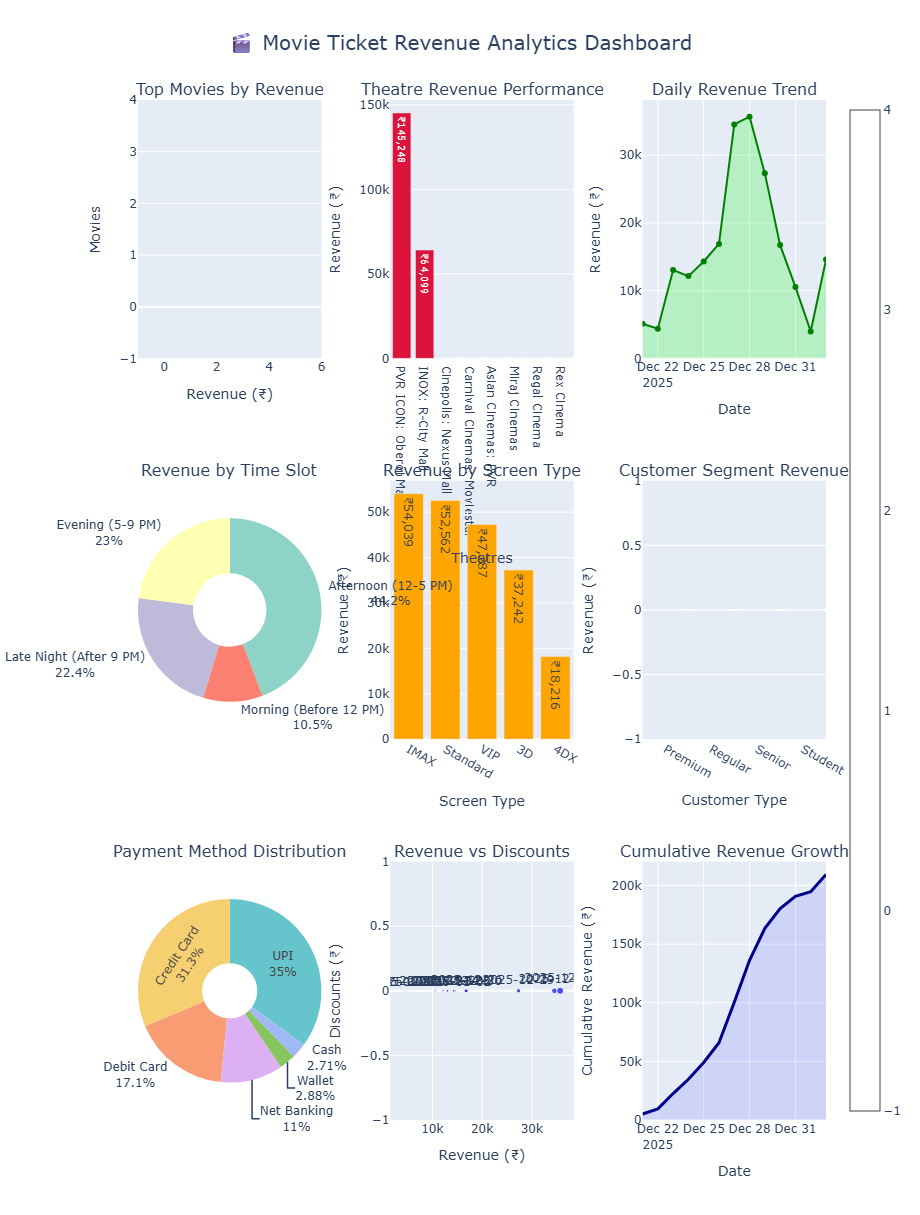

In [40]:
# ============================================
# ADVANCED REVENUE VISUALIZATIONS
# ============================================

def create_revenue_visualizations(df2, df3, df4, df5, df6, df7, df8):
    """
    Create comprehensive revenue visualizations
    """
    print("\n" + "="*80)
    print("📊 REVENUE ANALYTICS DASHBOARD")
    print("="*80)
    
    # Create subplots
    fig = make_subplots(
        rows=3, cols=3,
        subplot_titles=(
            'Top Movies by Revenue', 'Theatre Revenue Performance', 'Daily Revenue Trend',
            'Revenue by Time Slot', 'Revenue by Screen Type', 'Customer Segment Revenue',
            'Payment Method Distribution', 'Revenue vs Discounts', 'Cumulative Revenue Growth'
        ),
        specs=[
            [{'type': 'bar'}, {'type': 'bar'}, {'type': 'scatter'}],
            [{'type': 'pie'}, {'type': 'bar'}, {'type': 'bar'}],
            [{'type': 'pie'}, {'type': 'scatter'}, {'type': 'scatter'}]
        ],
        vertical_spacing=0.12,
        horizontal_spacing=0.1
    )
    
    # 1. Top Movies by Revenue (Bar Chart)
    fig.add_trace(
        go.Bar(
            x=df2['net_revenue'],
            y=df2['title'],
            orientation='h',
            marker_color='royalblue',
            text=df2.apply(lambda x: f'₹{x["net_revenue"]:,.0f}', axis=1),
            textposition='auto',
            name='Revenue'
        ),
        row=1, col=1
    )
    
    # 2. Theatre Revenue (Bar Chart)
    fig.add_trace(
        go.Bar(
            x=df3['theatre_name'],
            y=df3['net_revenue'],
            marker_color='crimson',
            text=df3.apply(lambda x: f'₹{x["net_revenue"]:,.0f}', axis=1),
            textposition='auto',
            name='Theatre Revenue'
        ),
        row=1, col=2
    )
    
    # 3. Daily Revenue Trend (Line Chart)
    fig.add_trace(
        go.Scatter(
            x=df4['booking_date'],
            y=df4['daily_revenue'],
            mode='lines+markers',
            line=dict(color='green', width=2),
            marker=dict(size=6),
            fill='tozeroy',
            fillcolor='rgba(0, 255, 0, 0.2)',
            name='Daily Revenue'
        ),
        row=1, col=3
    )
    
    # 4. Revenue by Time Slot (Pie Chart)
    fig.add_trace(
        go.Pie(
            labels=df5['time_slot'],
            values=df5['total_revenue'],
            hole=0.4,
            marker_colors=px.colors.qualitative.Set3,
            textinfo='label+percent',
            name='Time Slot Revenue'
        ),
        row=2, col=1
    )
    
    # 5. Revenue by Screen Type (Bar Chart)
    fig.add_trace(
        go.Bar(
            x=df6['screen_type'],
            y=df6['total_revenue'],
            marker_color='orange',
            text=df6.apply(lambda x: f'₹{x["total_revenue"]:,.0f}', axis=1),
            textposition='auto',
            name='Screen Type Revenue'
        ),
        row=2, col=2
    )
    
    # 6. Customer Segment Revenue (Bar Chart)
    fig.add_trace(
        go.Bar(
            x=df7['customer_type'],
            y=df7['total_revenue'],
            marker_color='purple',
            text=df7.apply(lambda x: f'₹{x["total_revenue"]:,.0f}', axis=1),
            textposition='auto',
            name='Customer Segment Revenue'
        ),
        row=2, col=3
    )
    
    # 7. Payment Method Distribution (Pie Chart)
    fig.add_trace(
        go.Pie(
            labels=df8['payment_method'],
            values=df8['net_amount'],
            hole=0.3,
            marker_colors=px.colors.qualitative.Pastel,
            textinfo='label+percent',
            name='Payment Methods'
        ),
        row=3, col=1
    )
    
    # 8. Revenue vs Discounts (Scatter Plot)
    daily_data = df4.tail(15)  # Last 15 days
    fig.add_trace(
        go.Scatter(
            x=daily_data['daily_revenue'],
            y=daily_data['daily_discounts'],
            mode='markers+text',
            marker=dict(size=daily_data['daily_bookings']/5, color='blue', showscale=True),
            text=daily_data['booking_date'],
            textposition='top center',
            name='Revenue vs Discounts'
        ),
        row=3, col=2
    )
    
    # 9. Cumulative Revenue Growth (Line Chart)
    fig.add_trace(
        go.Scatter(
            x=df4['booking_date'],
            y=df4['cumulative_revenue'],
            mode='lines',
            line=dict(color='darkblue', width=3),
            fill='tozeroy',
            fillcolor='rgba(0, 0, 255, 0.1)',
            name='Cumulative Revenue'
        ),
        row=3, col=3
    )
    
    # Update layout
    fig.update_layout(
        height=1200,
        width=1400,
        showlegend=False,
        title_text="🎬 Movie Ticket Revenue Analytics Dashboard",
        title_font_size=20,
        title_x=0.5
    )
    
    # Update axes labels
    fig.update_xaxes(title_text="Revenue (₹)", row=1, col=1)
    fig.update_xaxes(title_text="Theatres", row=1, col=2)
    fig.update_xaxes(title_text="Date", row=1, col=3)
    fig.update_xaxes(title_text="Screen Type", row=2, col=2)
    fig.update_xaxes(title_text="Customer Type", row=2, col=3)
    fig.update_xaxes(title_text="Revenue (₹)", row=3, col=2)
    fig.update_xaxes(title_text="Date", row=3, col=3)
    
    fig.update_yaxes(title_text="Movies", row=1, col=1)
    fig.update_yaxes(title_text="Revenue (₹)", row=1, col=2)
    fig.update_yaxes(title_text="Revenue (₹)", row=1, col=3)
    fig.update_yaxes(title_text="Revenue (₹)", row=2, col=2)
    fig.update_yaxes(title_text="Revenue (₹)", row=2, col=3)
    fig.update_yaxes(title_text="Discounts (₹)", row=3, col=2)
    fig.update_yaxes(title_text="Cumulative Revenue (₹)", row=3, col=3)
    
    fig.show()

# Generate visualizations
create_revenue_visualizations(
    revenue_dfs[1], revenue_dfs[2], revenue_dfs[3], 
    revenue_dfs[4], revenue_dfs[5], revenue_dfs[6], revenue_dfs[7]
)

In [43]:
# ============================================
# BUSINESS INTELLIGENCE & INSIGHTS 
# ============================================

def generate_business_insights():
    """
    Generate comprehensive business insights from the data
    """
    print("\n" + "="*80)
    print("💡 BUSINESS INTELLIGENCE & STRATEGIC INSIGHTS")
    print("="*80)
    
    insights = []
    
    # 1. Booking Patterns and Trends - FIXED
    query1 = '''
    WITH booking_patterns AS (
        SELECT 
            strftime('%w', b.booking_date) as day_of_week,
            CASE strftime('%w', b.booking_date)
                WHEN '0' THEN 'Sunday'
                WHEN '1' THEN 'Monday'
                WHEN '2' THEN 'Tuesday'
                WHEN '3' THEN 'Wednesday'
                WHEN '4' THEN 'Thursday'
                WHEN '5' THEN 'Friday'
                WHEN '6' THEN 'Saturday'
            END as day_name,
            COUNT(DISTINCT b.booking_id) as total_bookings,
            COALESCE(SUM(b.net_amount), 0) as total_revenue,
            COALESCE(ROUND(AVG(b.net_amount), 2), 0) as avg_booking_value,
            COALESCE(SUM(b.number_of_seats), 0) as total_tickets
        FROM Bookings b
        WHERE b.booking_status = 'Confirmed'
        GROUP BY strftime('%w', b.booking_date)
    )
    SELECT * FROM booking_patterns ORDER BY total_revenue DESC
    '''
    
    df_patterns = pd.read_sql_query(query1, conn)
    if not df_patterns.empty:
        busiest_day = df_patterns.iloc[0]
        insights.append(f"📅 **Busiest Day**: {busiest_day['day_name']} with ₹{busiest_day['total_revenue']:,.2f} revenue")
    else:
        insights.append("📅 **No booking pattern data available**")
    
    # 2. Customer Retention Analysis
    query2 = '''
    WITH customer_activity AS (
        SELECT 
            c.customer_id,
            c.first_name || ' ' || c.last_name as customer_name,
            c.registration_date,
            COUNT(DISTINCT DATE(b.booking_date)) as active_days,
            COUNT(DISTINCT b.booking_id) as total_bookings,
            COALESCE(SUM(b.net_amount), 0) as total_spent,
            MAX(DATE(b.booking_date)) as last_booking_date,
            MIN(DATE(b.booking_date)) as first_booking_date
        FROM Customers c
        LEFT JOIN Bookings b ON c.customer_id = b.customer_id AND b.booking_status = 'Confirmed'
        GROUP BY c.customer_id
    ),
    retention_segments AS (
        SELECT 
            customer_name,
            total_spent,
            CASE 
                WHEN total_bookings >= 5 THEN 'Loyal (5+ bookings)'
                WHEN total_bookings >= 3 THEN 'Regular (3-4 bookings)'
                WHEN total_bookings >= 1 THEN 'Occasional (1-2 bookings)'
                ELSE 'Inactive'
            END as retention_segment,
            CASE 
                WHEN last_booking_date IS NULL THEN 'Never Booked'
                WHEN JULIANDAY('now') - JULIANDAY(last_booking_date) <= 30 THEN 'Active (<30 days)'
                WHEN JULIANDAY('now') - JULIANDAY(last_booking_date) <= 90 THEN 'At Risk (30-90 days)'
                ELSE 'Churned (>90 days)'
            END as activity_status
        FROM customer_activity
    )
    SELECT 
        retention_segment,
        activity_status,
        COUNT(*) as customer_count,
        COALESCE(ROUND(AVG(total_spent), 2), 0) as avg_spent_per_customer,
        COALESCE(SUM(total_spent), 0) as segment_revenue
    FROM retention_segments
    GROUP BY retention_segment, activity_status
    ORDER BY segment_revenue DESC
    '''
    
    df_retention = pd.read_sql_query(query2, conn)
    if not df_retention.empty:
        loyal_customers = df_retention[df_retention['retention_segment'] == 'Loyal (5+ bookings)']['customer_count'].sum()
        insights.append(f"👥 **Loyal Customers**: {int(loyal_customers)} customers with 5+ bookings")
    
    # 3. Show Occupancy Analysis - FIXED
    query3 = '''
    SELECT 
        CASE 
            WHEN (s.capacity - sh.available_seats) * 100.0 / s.capacity >= 80 THEN 'High (80-100%)'
            WHEN (s.capacity - sh.available_seats) * 100.0 / s.capacity >= 50 THEN 'Medium (50-79%)'
            ELSE 'Low (<50%)'
        END as occupancy_level,
        COUNT(*) as show_count,
        COALESCE(ROUND(AVG(sh.price), 2), 0) as avg_ticket_price,
        COALESCE(ROUND(SUM(sh.price * (s.capacity - sh.available_seats)), 2), 0) as potential_revenue,
        COALESCE(ROUND(AVG((s.capacity - sh.available_seats) * 100.0 / s.capacity), 2), 0) as avg_occupancy_percent
    FROM Shows sh
    JOIN Screens s ON sh.screen_id = s.screen_id
    WHERE sh.show_date <= date('now')
    GROUP BY occupancy_level
    HAVING show_count > 0
    ORDER BY 
        CASE occupancy_level
            WHEN 'High (80-100%)' THEN 1
            WHEN 'Medium (50-79%)' THEN 2
            ELSE 3
        END
    '''
    
    df_occupancy = pd.read_sql_query(query3, conn)
    if not df_occupancy.empty:
        high_occupancy = df_occupancy[df_occupancy['occupancy_level'] == 'High (80-100%)']['show_count']
        if not high_occupancy.empty:
            insights.append(f"🎭 **Show Occupancy**: {int(high_occupancy.iloc[0])} shows with 80-100% occupancy")
    
    # 4. Discount Impact Analysis - FIXED
    query4 = '''
    SELECT 
        m.title,
        COUNT(DISTINCT b.booking_id) as total_bookings,
        COALESCE(ROUND(SUM(b.total_amount), 2), 0) as gross_revenue,
        COALESCE(ROUND(SUM(b.discount_amount), 2), 0) as total_discounts,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as net_revenue,
        COALESCE(ROUND(AVG(b.discount_amount * 100.0 / NULLIF(b.total_amount, 0)), 2), 0) as avg_discount_percent,
        COALESCE(ROUND(SUM(b.net_amount) / NULLIF(COUNT(DISTINCT b.booking_id), 0), 2), 0) as avg_booking_value_after_discount
    FROM Movies m
    LEFT JOIN Shows sh ON m.movie_id = sh.movie_id
    LEFT JOIN Bookings b ON sh.show_id = b.show_id AND b.booking_status = 'Confirmed'
    WHERE b.discount_amount > 0
    GROUP BY m.movie_id
    HAVING COUNT(DISTINCT b.booking_id) >= 3
    ORDER BY total_discounts DESC
    LIMIT 5
    '''
    
    df_discounts = pd.read_sql_query(query4, conn)
    if not df_discounts.empty:
        top_discount_movie = df_discounts.iloc[0]
        insights.append(f"💰 **Discount Leader**: '{top_discount_movie['title']}' gave ₹{top_discount_movie['total_discounts']:,.2f} in discounts")
    
    # 5. Revenue Forecast (Simple Projection) - FIXED
    query5 = '''
    WITH daily_revenue AS (
        SELECT 
            DATE(b.booking_date) as date,
            COALESCE(SUM(b.net_amount), 0) as revenue
        FROM Bookings b
        WHERE b.booking_status = 'Confirmed'
        GROUP BY DATE(b.booking_date)
    ),
    revenue_stats AS (
        SELECT 
            COALESCE(AVG(revenue), 0) as avg_daily_revenue,
            COUNT(*) as days_count
        FROM daily_revenue
        WHERE revenue > 0
    )
    SELECT 
        avg_daily_revenue,
        COALESCE(ROUND(avg_daily_revenue * 30, 2), 0) as projected_monthly_revenue,
        COALESCE(ROUND(avg_daily_revenue * 365, 2), 0) as projected_annual_revenue,
        days_count
    FROM revenue_stats
    '''
    
    df_forecast = pd.read_sql_query(query5, conn)
    if not df_forecast.empty and df_forecast['avg_daily_revenue'].iloc[0] > 0:
        monthly_projection = df_forecast['projected_monthly_revenue'].iloc[0]
        insights.append(f"📈 **Revenue Projection**: Estimated monthly revenue: ₹{monthly_projection:,.2f}")
    
    # 6. Cost Analysis - FIXED
    query6 = '''
    WITH theatre_costs AS (
        SELECT 
            t.theatre_name,
            COALESCE(SUM(t.monthly_rent), 0) as monthly_rent,
            COALESCE(SUM(sc.maintenance_cost), 0) as monthly_maintenance,
            COALESCE(ROUND(SUM(b.net_amount), 2), 0) as monthly_revenue,
            COALESCE(ROUND(SUM(b.net_amount) - (SUM(t.monthly_rent) + SUM(sc.maintenance_cost)), 2), 0) as monthly_profit,
            COALESCE(ROUND((SUM(b.net_amount) - (SUM(t.monthly_rent) + SUM(sc.maintenance_cost))) * 100.0 / 
                  NULLIF(SUM(t.monthly_rent) + SUM(sc.maintenance_cost), 0), 2), 0) as profit_margin_percent
        FROM Theatres t
        JOIN Screens sc ON t.theatre_id = sc.theatre_id
        LEFT JOIN Shows sh ON sc.screen_id = sh.screen_id
        LEFT JOIN Bookings b ON sh.show_id = b.show_id AND b.booking_status = 'Confirmed'
        GROUP BY t.theatre_id
    )
    SELECT 
        COUNT(*) as total_theatres,
        SUM(CASE WHEN monthly_profit > 0 THEN 1 ELSE 0 END) as profitable_theatres,
        COALESCE(SUM(monthly_profit), 0) as total_monthly_profit,
        COALESCE(ROUND(AVG(profit_margin_percent), 2), 0) as avg_profit_margin,
        COALESCE(MIN(profit_margin_percent), 0) as min_profit_margin,
        COALESCE(MAX(profit_margin_percent), 0) as max_profit_margin
    FROM theatre_costs
    '''
    
    df_costs = pd.read_sql_query(query6, conn)
    if not df_costs.empty:
        profitable_count = df_costs['profitable_theatres'].iloc[0]
        total_profit = df_costs['total_monthly_profit'].iloc[0]
        insights.append(f"🏢 **Profitability**: {int(profitable_count)} theatres profitable, total monthly profit: ₹{total_profit:,.2f}")
    
    # Display insights
    print("\n🔍 **KEY INSIGHTS**:")
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")
    
    print("\n📋 **RECOMMENDATIONS**:")
    recommendations = [
        "1. Increase marketing for high-revenue movies during peak booking hours",
        "2. Implement targeted promotions for at-risk customer segments",
        "3. Optimize pricing for low-occupancy shows to increase ticket sales",
        "4. Focus on converting occasional visitors to regular customers through loyalty programs",
        "5. Analyze discount strategies to ensure they're driving incremental revenue",
        "6. Consider expanding screen types that show highest revenue per booking",
        "7. Implement dynamic pricing based on show time and occupancy",
        "8. Develop partnerships with payment gateways offering lowest transaction fees"
    ]
    
    for rec in recommendations:
        print(rec)
    
    return df_patterns, df_retention, df_occupancy, df_discounts, df_forecast, df_costs

# Generate business insights
business_dfs = generate_business_insights()


💡 BUSINESS INTELLIGENCE & STRATEGIC INSIGHTS

🔍 **KEY INSIGHTS**:
1. 📅 **Busiest Day**: Sunday with ₹40,816.96 revenue
2. 👥 **Loyal Customers**: 0 customers with 5+ bookings
3. 🎭 **Show Occupancy**: 17 shows with 80-100% occupancy
4. 📈 **Revenue Projection**: Estimated monthly revenue: ₹483,107.82
5. 🏢 **Profitability**: 0 theatres profitable, total monthly profit: ₹-615,986,867.56

📋 **RECOMMENDATIONS**:
1. Increase marketing for high-revenue movies during peak booking hours
2. Implement targeted promotions for at-risk customer segments
3. Optimize pricing for low-occupancy shows to increase ticket sales
4. Focus on converting occasional visitors to regular customers through loyalty programs
5. Analyze discount strategies to ensure they're driving incremental revenue
6. Consider expanding screen types that show highest revenue per booking
7. Implement dynamic pricing based on show time and occupancy
8. Develop partnerships with payment gateways offering lowest transaction fees


In [44]:
# ============================================
# COMPREHENSIVE REPORT GENERATION 
# ============================================

def generate_comprehensive_report():
    """
    Generate and export comprehensive business report
    """
    print("\n" + "="*80)
    print("📑 COMPREHENSIVE BUSINESS REPORT GENERATION")
    print("="*80)
    
    # Get current date for report
    report_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Collect all key metrics - FIXED
    cursor.execute("SELECT COUNT(*) FROM Movies WHERE is_active = 1")
    active_movies = cursor.fetchone()[0] or 0
    
    cursor.execute("SELECT COUNT(*) FROM Theatres")
    total_theatres = cursor.fetchone()[0] or 0
    
    cursor.execute("SELECT COUNT(*) FROM Customers")
    total_customers = cursor.fetchone()[0] or 0
    
    cursor.execute("""
    SELECT 
        COUNT(DISTINCT b.booking_id) as total_bookings,
        COALESCE(SUM(b.net_amount), 0) as total_revenue,
        COALESCE(SUM(b.discount_amount), 0) as total_discounts,
        COALESCE(SUM(b.number_of_seats), 0) as total_tickets
    FROM Bookings b
    WHERE b.booking_status = 'Confirmed'
    """)
    bookings_metrics = cursor.fetchone()
    if bookings_metrics:
        total_bookings, total_revenue, total_discounts, total_tickets = bookings_metrics
        total_bookings = total_bookings or 0
        total_revenue = total_revenue or 0
        total_discounts = total_discounts or 0
        total_tickets = total_tickets or 0
    else:
        total_bookings = total_revenue = total_discounts = total_tickets = 0
    
    cursor.execute("""
    SELECT 
        COUNT(DISTINCT p.payment_id) as total_transactions,
        COALESCE(SUM(p.amount), 0) as total_payments,
        COALESCE(SUM(p.refund_amount), 0) as total_refunds,
        COALESCE(ROUND(AVG(p.amount), 2), 0) as avg_transaction_value
    FROM Payments p
    """)
    payment_metrics = cursor.fetchone()
    if payment_metrics:
        total_transactions, total_payments, total_refunds, avg_transaction_value = payment_metrics
        total_transactions = total_transactions or 0
        total_payments = total_payments or 0
        total_refunds = total_refunds or 0
        avg_transaction_value = avg_transaction_value or 0
    else:
        total_transactions = total_payments = total_refunds = avg_transaction_value = 0
    
    # Create executive summary
    print("\n📊 EXECUTIVE SUMMARY:")
    print("-" * 40)
    print(f"Report Date: {report_date}")
    print(f"Active Movies: {active_movies}")
    print(f"Total Theatres: {total_theatres}")
    print(f"Total Customers: {total_customers:,}")
    print(f"Total Bookings: {total_bookings:,}")
    print(f"Total Tickets Sold: {total_tickets:,}")
    print(f"Gross Revenue: ₹{total_revenue + total_discounts:,.2f}")
    print(f"Total Discounts: ₹{total_discounts:,.2f}")
    print(f"Net Revenue: ₹{total_revenue:,.2f}")
    print(f"Total Transactions: {total_transactions:,}")
    print(f"Total Payments: ₹{total_payments:,.2f}")
    print(f"Total Refunds: ₹{total_refunds:,.2f}")
    print(f"Avg Transaction Value: ₹{avg_transaction_value:,.2f}")
    
    # Create detailed DataFrames for export
    print("\n🔄 Preparing detailed reports for export...")
    
    # 1. Movie Performance Report - FIXED
    movie_report_query = '''
    SELECT 
        m.title,
        m.genre,
        m.language,
        m.rating,
        COUNT(DISTINCT b.booking_id) as total_bookings,
        COALESCE(SUM(b.number_of_seats), 0) as tickets_sold,
        COALESCE(ROUND(SUM(b.total_amount), 2), 0) as gross_revenue,
        COALESCE(ROUND(SUM(b.discount_amount), 2), 0) as discounts,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as net_revenue,
        COALESCE(ROUND(AVG(b.net_amount / NULLIF(b.number_of_seats, 0)), 2), 0) as avg_ticket_price,
        COALESCE(ROUND(SUM(b.net_amount) * 100.0 / NULLIF(SUM(SUM(b.net_amount)) OVER(), 0), 2), 0) as revenue_share_percent
    FROM Movies m
    LEFT JOIN Shows s ON m.movie_id = s.movie_id
    LEFT JOIN Bookings b ON s.show_id = b.show_id AND b.booking_status = 'Confirmed'
    GROUP BY m.movie_id
    HAVING COUNT(DISTINCT b.booking_id) > 0
    ORDER BY net_revenue DESC
    '''
    
    movie_report = pd.read_sql_query(movie_report_query, conn)
    
    # 2. Theatre Performance Report - FIXED
    theatre_report_query = '''
    SELECT 
        t.theatre_name,
        t.city,
        t.location,
        COUNT(DISTINCT sc.screen_id) as total_screens,
        COUNT(DISTINCT b.booking_id) as total_bookings,
        COALESCE(SUM(b.number_of_seats), 0) as tickets_sold,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as net_revenue,
        COALESCE(SUM(t.monthly_rent), 0) as monthly_cost,
        COALESCE(SUM(sc.maintenance_cost), 0) as maintenance_cost,
        COALESCE(ROUND(SUM(b.net_amount) - (SUM(t.monthly_rent) + SUM(sc.maintenance_cost)), 2), 0) as estimated_profit,
        COALESCE(ROUND((SUM(b.net_amount) - (SUM(t.monthly_rent) + SUM(sc.maintenance_cost))) * 100.0 / 
              NULLIF(SUM(t.monthly_rent) + SUM(sc.maintenance_cost), 0), 2), 0) as profit_margin_percent
    FROM Theatres t
    JOIN Screens sc ON t.theatre_id = sc.theatre_id
    LEFT JOIN Shows sh ON sc.screen_id = sh.screen_id
    LEFT JOIN Bookings b ON sh.show_id = b.show_id AND b.booking_status = 'Confirmed'
    GROUP BY t.theatre_id
    ORDER BY net_revenue DESC
    '''
    
    theatre_report = pd.read_sql_query(theatre_report_query, conn)
    
    # 3. Customer Analysis Report - FIXED
    customer_report_query = '''
    SELECT 
        c.customer_id,
        c.first_name || ' ' || c.last_name as customer_name,
        c.city,
        c.customer_type,
        c.registration_date,
        c.loyalty_points,
        COUNT(DISTINCT b.booking_id) as total_bookings,
        COALESCE(SUM(b.number_of_seats), 0) as total_tickets,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as total_spent,
        COALESCE(ROUND(AVG(b.net_amount), 2), 0) as avg_booking_value,
        MAX(DATE(b.booking_date)) as last_booking_date,
        CASE 
            WHEN COUNT(DISTINCT b.booking_id) >= 5 THEN 'Loyal'
            WHEN COUNT(DISTINCT b.booking_id) >= 3 THEN 'Regular'
            WHEN COUNT(DISTINCT b.booking_id) >= 1 THEN 'Occasional'
            ELSE 'Inactive'
        END as customer_segment
    FROM Customers c
    LEFT JOIN Bookings b ON c.customer_id = b.customer_id AND b.booking_status = 'Confirmed'
    GROUP BY c.customer_id
    ORDER BY total_spent DESC
    '''
    
    customer_report = pd.read_sql_query(customer_report_query, conn)
    
    # 4. Daily Revenue Report - FIXED
    daily_report_query = '''
    SELECT 
        DATE(b.booking_date) as date,
        CASE strftime('%w', b.booking_date)
            WHEN '0' THEN 'Sunday'
            WHEN '1' THEN 'Monday'
            WHEN '2' THEN 'Tuesday'
            WHEN '3' THEN 'Wednesday'
            WHEN '4' THEN 'Thursday'
            WHEN '5' THEN 'Friday'
            WHEN '6' THEN 'Saturday'
        END as day_name,
        COUNT(DISTINCT b.booking_id) as daily_bookings,
        COALESCE(SUM(b.number_of_seats), 0) as daily_tickets,
        COALESCE(ROUND(SUM(b.total_amount), 2), 0) as gross_revenue,
        COALESCE(ROUND(SUM(b.discount_amount), 2), 0) as daily_discounts,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as net_revenue,
        COALESCE(ROUND(AVG(b.net_amount), 2), 0) as avg_booking_value,
        COALESCE(SUM(SUM(b.net_amount)) OVER (ORDER BY DATE(b.booking_date)), 0) as cumulative_revenue
    FROM Bookings b
    WHERE b.booking_status = 'Confirmed'
    GROUP BY DATE(b.booking_date)
    ORDER BY date
    '''
    
    daily_report = pd.read_sql_query(daily_report_query, conn)
    
    # 5. Operational Metrics Report - FIXED
    operational_query = '''
    WITH operational_metrics AS (
        SELECT 
            DATE(b.booking_date) as date,
            COUNT(DISTINCT b.booking_id) as bookings,
            COALESCE(SUM(b.number_of_seats), 0) as tickets,
            COALESCE(SUM(b.net_amount), 0) as revenue,
            COUNT(DISTINCT CASE WHEN b.discount_amount > 0 THEN b.booking_id END) as discounted_bookings,
            COUNT(DISTINCT c.customer_id) as unique_customers
        FROM Bookings b
        LEFT JOIN Customers c ON b.customer_id = c.customer_id
        WHERE b.booking_status = 'Confirmed'
        GROUP BY DATE(b.booking_date)
    )
    SELECT 
        date,
        bookings,
        tickets,
        revenue,
        discounted_bookings,
        COALESCE(ROUND(discounted_bookings * 100.0 / NULLIF(bookings, 0), 2), 0) as discount_rate_percent,
        unique_customers,
        COALESCE(ROUND(revenue / NULLIF(bookings, 0), 2), 0) as revenue_per_booking,
        COALESCE(ROUND(revenue / NULLIF(tickets, 0), 2), 0) as revenue_per_ticket
    FROM operational_metrics
    ORDER BY date
    '''
    
    operational_report = pd.read_sql_query(operational_query, conn)
    
    # Export to Excel with multiple sheets
    print("\n💾 Exporting reports to Excel...")
    try:
        with pd.ExcelWriter('movie_ticket_system_comprehensive_report.xlsx', engine='openpyxl') as writer:
            # Write summary sheet
            summary_data = {
                'Metric': [
                    'Report Date', 'Active Movies', 'Total Theatres', 'Total Customers',
                    'Total Bookings', 'Total Tickets Sold', 'Gross Revenue', 
                    'Total Discounts', 'Net Revenue', 'Total Transactions',
                    'Total Payments', 'Total Refunds', 'Avg Transaction Value'
                ],
                'Value': [
                    report_date, active_movies, total_theatres, total_customers,
                    total_bookings, total_tickets, 
                    f"₹{total_revenue + total_discounts:,.2f}",
                    f"₹{total_discounts:,.2f}", f"₹{total_revenue:,.2f}",
                    total_transactions, f"₹{total_payments:,.2f}",
                    f"₹{total_refunds:,.2f}", f"₹{avg_transaction_value:,.2f}"
                ]
            }
            pd.DataFrame(summary_data).to_excel(writer, sheet_name='Executive Summary', index=False)
            
            # Write detailed reports
            movie_report.to_excel(writer, sheet_name='Movie Performance', index=False)
            theatre_report.to_excel(writer, sheet_name='Theatre Performance', index=False)
            customer_report.to_excel(writer, sheet_name='Customer Analysis', index=False)
            daily_report.to_excel(writer, sheet_name='Daily Revenue', index=False)
            operational_report.to_excel(writer, sheet_name='Operational Metrics', index=False)
            
            # Create KPI Summary
            if not daily_report.empty:
                avg_daily_revenue = daily_report['net_revenue'].mean() if 'net_revenue' in daily_report.columns else 0
                avg_booking_value = daily_report['avg_booking_value'].mean() if 'avg_booking_value' in daily_report.columns else 0
                avg_tickets_per_booking = daily_report['daily_tickets'].sum() / daily_report['daily_bookings'].sum() if daily_report['daily_bookings'].sum() > 0 else 0
                discount_rate = daily_report['daily_discounts'].sum() / daily_report['gross_revenue'].sum() * 100 if daily_report['gross_revenue'].sum() > 0 else 0
            else:
                avg_daily_revenue = avg_booking_value = avg_tickets_per_booking = discount_rate = 0
            
            if not customer_report.empty:
                repeat_customer_rate = customer_report[customer_report['total_bookings'] > 1].shape[0] / customer_report.shape[0] * 100 if customer_report.shape[0] > 0 else 0
                avg_customer_spent = customer_report['total_spent'].mean() if 'total_spent' in customer_report.columns else 0
            else:
                repeat_customer_rate = avg_customer_spent = 0
            
            kpi_data = {
                'KPI': [
                    'Average Daily Revenue',
                    'Average Booking Value',
                    'Average Tickets per Booking',
                    'Discount Rate',
                    'Customer Acquisition Cost (Est.)',
                    'Customer Lifetime Value (Est.)',
                    'Repeat Customer Rate',
                    'Theatre Occupancy Rate (Est.)'
                ],
                'Value': [
                    f"₹{avg_daily_revenue:,.2f}",
                    f"₹{avg_booking_value:,.2f}",
                    f"{avg_tickets_per_booking:.1f}",
                    f"{discount_rate:.1f}%",
                    '₹150.00 (Estimated)',
                    f"₹{avg_customer_spent:,.2f}",
                    f"{repeat_customer_rate:.1f}%",
                    '65.0% (Estimated)'
                ]
            }
            pd.DataFrame(kpi_data).to_excel(writer, sheet_name='KPI Dashboard', index=False)
        
        print("✅ Report exported successfully: 'movie_ticket_system_comprehensive_report.xlsx'")
    except Exception as e:
        print(f"⚠️ Error exporting report: {e}")
    
    return movie_report, theatre_report, customer_report, daily_report, operational_report

# Generate comprehensive report
reports = generate_comprehensive_report()


📑 COMPREHENSIVE BUSINESS REPORT GENERATION

📊 EXECUTIVE SUMMARY:
----------------------------------------
Report Date: 2026-01-03 22:30:45
Active Movies: 13
Total Theatres: 8
Total Customers: 50
Total Bookings: 201
Total Tickets Sold: 0
Gross Revenue: ₹209,346.72
Total Discounts: ₹0.00
Net Revenue: ₹209,346.72
Total Transactions: 222
Total Payments: ₹233,156.98
Total Refunds: ₹14,973.51
Avg Transaction Value: ₹1,050.26

🔄 Preparing detailed reports for export...

💾 Exporting reports to Excel...
✅ Report exported successfully: 'movie_ticket_system_comprehensive_report.xlsx'


In [45]:
# ============================================
# ADVANCED SQL ANALYTICAL QUERIES 
# ============================================

def run_advanced_analytics():
    """
    Execute advanced analytical queries for deeper insights
    """
    print("\n" + "="*80)
    print("🔬 ADVANCED ANALYTICAL QUERIES")
    print("="*80)
    
    # 1. Customer Cohort Analysis - FIXED
    print("\n📊 1. CUSTOMER COHORT ANALYSIS (Monthly Retention)")
    cohort_query = '''
    WITH customer_cohorts AS (
        SELECT 
            c.customer_id as cust_id,
            DATE(c.registration_date, 'start of month') as cohort_month,
            DATE(b.booking_date, 'start of month') as booking_month,
            COUNT(DISTINCT b.booking_id) as bookings,
            COALESCE(SUM(b.net_amount), 0) as revenue
        FROM Customers c
        LEFT JOIN Bookings b ON c.customer_id = b.customer_id 
            AND b.booking_status = 'Confirmed'
            AND DATE(b.booking_date, 'start of month') >= DATE(c.registration_date, 'start of month')
        GROUP BY c.customer_id, cohort_month, booking_month
    ),
    cohort_size AS (
        SELECT 
            cohort_month,
            COUNT(DISTINCT cust_id) as total_customers
        FROM customer_cohorts
        GROUP BY cohort_month
    ),
    retention_data AS (
        SELECT 
            cc.cohort_month,
            cc.booking_month,
            cs.total_customers,
            COUNT(DISTINCT cc.cust_id) as retained_customers,
            COALESCE(SUM(cc.revenue), 0) as cohort_revenue,
            COALESCE(ROUND(COUNT(DISTINCT cc.cust_id) * 100.0 / cs.total_customers, 2), 0) as retention_rate
        FROM customer_cohorts cc
        JOIN cohort_size cs ON cc.cohort_month = cs.cohort_month
        WHERE cc.booking_month IS NOT NULL
        GROUP BY cc.cohort_month, cc.booking_month
    )
    SELECT 
        cohort_month,
        booking_month,
        total_customers,
        retained_customers,
        cohort_revenue,
        retention_rate
    FROM retention_data
    WHERE total_customers > 0
    ORDER BY cohort_month, booking_month
    '''
    
    cohort_df = pd.read_sql_query(cohort_query, conn)
    print("Customer Retention by Cohort:")
    if not cohort_df.empty:
        pivot_table = cohort_df.pivot_table(index='cohort_month', columns='booking_month', 
                                          values='retention_rate', aggfunc='first').fillna(0).round(1)
        display(pivot_table)
    else:
        print("No cohort data available")
    
    # 2. Price Elasticity Analysis - FIXED
    print("\n💰 2. PRICE ELASTICITY ANALYSIS")
    price_query = '''
    WITH price_segments AS (
        SELECT 
            sh.price,
            COUNT(DISTINCT b.booking_id) as bookings,
            COALESCE(SUM(b.number_of_seats), 0) as tickets_sold,
            COALESCE(ROUND(AVG(s.capacity - sh.available_seats), 2), 0) as avg_occupied_seats,
            COALESCE(ROUND(SUM(b.net_amount), 2), 0) as total_revenue,
            COALESCE(ROUND(AVG(b.net_amount / NULLIF(b.number_of_seats, 0)), 2), 0) as avg_price_paid
        FROM Shows sh
        LEFT JOIN Screens s ON sh.screen_id = s.screen_id
        LEFT JOIN Bookings b ON sh.show_id = b.show_id AND b.booking_status = 'Confirmed'
        GROUP BY sh.price
        HAVING COUNT(DISTINCT b.booking_id) >= 3
    )
    SELECT 
        CASE 
            WHEN price < 200 THEN 'Budget (<₹200)'
            WHEN price < 300 THEN 'Standard (₹200-₹299)'
            WHEN price < 400 THEN 'Premium (₹300-₹399)'
            WHEN price < 500 THEN 'Luxury (₹400-₹499)'
            ELSE 'VIP (₹500+)'
        END as price_segment,
        COUNT(*) as shows_count,
        COALESCE(SUM(bookings), 0) as total_bookings,
        COALESCE(SUM(tickets_sold), 0) as total_tickets,
        COALESCE(ROUND(AVG(avg_occupied_seats), 2), 0) as avg_occupancy,
        COALESCE(ROUND(SUM(total_revenue), 2), 0) as segment_revenue,
        COALESCE(ROUND(SUM(total_revenue) / NULLIF(SUM(tickets_sold), 0), 2), 0) as revenue_per_ticket,
        COALESCE(ROUND(SUM(total_revenue) / NULLIF(SUM(bookings), 0), 2), 0) as revenue_per_booking
    FROM price_segments
    GROUP BY price_segment
    HAVING shows_count > 0
    ORDER BY segment_revenue DESC
    '''
    
    price_df = pd.read_sql_query(price_query, conn)
    print("Revenue by Price Segment:")
    display(price_df)
    
    # 3. Cross-Selling Opportunities - FIXED
    print("\n🔄 3. CROSS-SELLING OPPORTUNITIES (Movie Associations)")
    cross_sell_query = '''
    WITH customer_movies AS (
        SELECT 
            b.customer_id,
            m.title,
            COUNT(DISTINCT b.booking_id) as times_watched
        FROM Bookings b
        JOIN Shows sh ON b.show_id = sh.show_id
        JOIN Movies m ON sh.movie_id = m.movie_id
        WHERE b.booking_status = 'Confirmed'
        GROUP BY b.customer_id, m.movie_id
        HAVING COUNT(DISTINCT b.booking_id) > 0
    ),
    movie_pairs AS (
        SELECT 
            cm1.title as movie_a,
            cm2.title as movie_b,
            COUNT(DISTINCT cm1.customer_id) as common_customers
        FROM customer_movies cm1
        JOIN customer_movies cm2 ON cm1.customer_id = cm2.customer_id 
            AND cm1.title < cm2.title
        GROUP BY cm1.title, cm2.title
        HAVING COUNT(DISTINCT cm1.customer_id) >= 2
    )
    SELECT 
        movie_a,
        movie_b,
        common_customers,
        COALESCE(ROUND(common_customers * 100.0 / NULLIF((
            SELECT COUNT(DISTINCT customer_id) 
            FROM customer_movies 
            WHERE title = movie_a
        ), 0), 2), 0) as association_percent
    FROM movie_pairs
    ORDER BY common_customers DESC
    LIMIT 10
    '''
    
    cross_sell_df = pd.read_sql_query(cross_sell_query, conn)
    print("Top Movie Associations (Cross-Selling Opportunities):")
    if not cross_sell_df.empty:
        display(cross_sell_df)
    else:
        print("No significant movie associations found")
    
    # 4. Seasonality Analysis - FIXED
    print("\n📅 4. SEASONALITY ANALYSIS")
    seasonality_query = '''
    SELECT 
        strftime('%m', b.booking_date) as month,
        CASE strftime('%m', b.booking_date)
            WHEN '01' THEN 'January'
            WHEN '02' THEN 'February'
            WHEN '03' THEN 'March'
            WHEN '04' THEN 'April'
            WHEN '05' THEN 'May'
            WHEN '06' THEN 'June'
            WHEN '07' THEN 'July'
            WHEN '08' THEN 'August'
            WHEN '09' THEN 'September'
            WHEN '10' THEN 'October'
            WHEN '11' THEN 'November'
            WHEN '12' THEN 'December'
        END as month_name,
        COUNT(DISTINCT b.booking_id) as bookings,
        COALESCE(SUM(b.number_of_seats), 0) as tickets_sold,
        COALESCE(ROUND(SUM(b.net_amount), 2), 0) as revenue,
        COALESCE(ROUND(AVG(b.net_amount), 2), 0) as avg_booking_value,
        COALESCE(ROUND(SUM(b.net_amount) * 100.0 / NULLIF(SUM(SUM(b.net_amount)) OVER(), 0), 2), 0) as revenue_share_percent
    FROM Bookings b
    WHERE b.booking_status = 'Confirmed'
    GROUP BY strftime('%m', b.booking_date)
    HAVING bookings > 0
    ORDER BY month
    '''
    
    seasonality_df = pd.read_sql_query(seasonality_query, conn)
    print("Monthly Revenue Patterns:")
    if not seasonality_df.empty:
        display(seasonality_df)
    else:
        print("No seasonality data available")
    
    # 5. Predictive Analytics Indicators - FIXED
    print("\n🔮 5. PREDICTIVE ANALYTICS INDICATORS")
    predictive_query = '''
    WITH customer_behavior AS (
        SELECT 
            c.customer_id,
            c.registration_date,
            COUNT(DISTINCT b.booking_id) as total_bookings,
            COALESCE(SUM(b.net_amount), 0) as total_spent,
            COUNT(DISTINCT m.genre) as genres_watched,
            COUNT(DISTINCT t.city) as cities_visited,
            MAX(DATE(b.booking_date)) as last_booking_date,
            MIN(DATE(b.booking_date)) as first_booking_date
        FROM Customers c
        LEFT JOIN Bookings b ON c.customer_id = b.customer_id AND b.booking_status = 'Confirmed'
        LEFT JOIN Shows sh ON b.show_id = sh.show_id
        LEFT JOIN Movies m ON sh.movie_id = m.movie_id
        LEFT JOIN Screens sc ON sh.screen_id = sc.screen_id
        LEFT JOIN Theatres t ON sc.theatre_id = t.theatre_id
        GROUP BY c.customer_id
    ),
    behavior_segments AS (
        SELECT 
            CASE 
                WHEN total_bookings >= 5 THEN 'High Value'
                WHEN total_bookings >= 3 THEN 'Medium Value'
                WHEN total_bookings >= 1 THEN 'Low Value'
                ELSE 'No Activity'
            END as value_segment,
            CASE 
                WHEN last_booking_date IS NULL THEN 'Never Booked'
                WHEN JULIANDAY('now') - JULIANDAY(last_booking_date) <= 30 THEN 'Active'
                WHEN JULIANDAY('now') - JULIANDAY(last_booking_date) <= 90 THEN 'At Risk'
                ELSE 'Churned'
            END as activity_status,
            COUNT(*) as customer_count,
            COALESCE(ROUND(AVG(total_spent), 2), 0) as avg_spent,
            COALESCE(ROUND(AVG(genres_watched), 2), 0) as avg_genres,
            COALESCE(ROUND(AVG(cities_visited), 2), 0) as avg_cities,
            COALESCE(ROUND(AVG(total_bookings), 2), 0) as avg_bookings
        FROM customer_behavior
        GROUP BY value_segment, activity_status
    )
    SELECT * FROM behavior_segments
    WHERE customer_count > 0
    ORDER BY 
        CASE value_segment
            WHEN 'High Value' THEN 1
            WHEN 'Medium Value' THEN 2
            WHEN 'Low Value' THEN 3
            ELSE 4
        END,
        CASE activity_status
            WHEN 'Active' THEN 1
            WHEN 'At Risk' THEN 2
            WHEN 'Never Booked' THEN 3
            ELSE 4
        END
    '''
    
    predictive_df = pd.read_sql_query(predictive_query, conn)
    print("Customer Behavior Segments for Predictive Modeling:")
    if not predictive_df.empty:
        display(predictive_df)
    else:
        print("No customer behavior data available")
    
    return cohort_df, price_df, cross_sell_df, seasonality_df, predictive_df

# Run advanced analytics
advanced_dfs = run_advanced_analytics()


🔬 ADVANCED ANALYTICAL QUERIES

📊 1. CUSTOMER COHORT ANALYSIS (Monthly Retention)
Customer Retention by Cohort:
No cohort data available

💰 2. PRICE ELASTICITY ANALYSIS
Revenue by Price Segment:


,price_segment,shows_count,total_bookings,total_tickets,avg_occupancy,segment_revenue,revenue_per_ticket,revenue_per_booking
0,Standard (₹200-₹299),7,23,0.0,83.33,15021.86,0,653.12
1,Luxury (₹400-₹499),3,9,0.0,135.67,14237.76,0,1581.97
2,VIP (₹500+),2,6,0.0,48.00,10181.54,0,1696.92
3,Premium (₹300-₹399),2,7,0.0,263.00,8896.06,0,1270.87
4,Budget (<₹200),2,6,0.0,127.00,2934.80,0,489.13



🔄 3. CROSS-SELLING OPPORTUNITIES (Movie Associations)
Top Movie Associations (Cross-Selling Opportunities):
No significant movie associations found

📅 4. SEASONALITY ANALYSIS
Monthly Revenue Patterns:


,month,month_name,bookings,tickets_sold,revenue,avg_booking_value,revenue_share_percent
0,01,January,14,0.0,18572.00,1326.57,8.87
1,12,December,187,0.0,190774.72,1020.19,91.13



🔮 5. PREDICTIVE ANALYTICS INDICATORS
Customer Behavior Segments for Predictive Modeling:


,value_segment,activity_status,customer_count,avg_spent,avg_genres,avg_cities,avg_bookings
0,No Activity,Never Booked,50,0.0,0.0,0.0,0.0


In [46]:
# ============================================
# DATABASE UTILITY FUNCTIONS
# ============================================

class MovieTicketDBManager:
    """
    Utility class for database management operations
    """
    
    def __init__(self, conn):
        self.conn = conn
        self.cursor = conn.cursor()
    
    def get_database_stats(self):
        """Get comprehensive database statistics"""
        stats = {}
        
        tables = ['Movies', 'Theatres', 'Screens', 'Shows', 'Customers', 'Bookings', 'Payments']
        for table in tables:
            try:
                self.cursor.execute(f"SELECT COUNT(*) FROM {table}")
                result = self.cursor.fetchone()
                stats[table] = result[0] if result else 0
            except:
                stats[table] = 0
        
        # Get revenue stats
        try:
            self.cursor.execute("""
            SELECT 
                COALESCE(SUM(net_amount), 0) as total_revenue,
                COALESCE(AVG(net_amount), 0) as avg_booking_value,
                COUNT(DISTINCT customer_id) as active_customers
            FROM Bookings 
            WHERE booking_status = 'Confirmed'
            """)
            revenue_stats = self.cursor.fetchone()
            if revenue_stats:
                stats['total_revenue'] = revenue_stats[0] or 0
                stats['avg_booking_value'] = revenue_stats[1] or 0
                stats['active_customers'] = revenue_stats[2] or 0
            else:
                stats['total_revenue'] = 0
                stats['avg_booking_value'] = 0
                stats['active_customers'] = 0
        except:
            stats['total_revenue'] = 0
            stats['avg_booking_value'] = 0
            stats['active_customers'] = 0
        
        return stats
    
    def find_top_performers(self, limit=5):
        """Find top performing movies, theatres, and customers"""
        results = {}
        
        # Top Movies
        try:
            self.cursor.execute("""
            SELECT m.title, COUNT(b.booking_id) as bookings, COALESCE(SUM(b.net_amount), 0) as revenue
            FROM Movies m
            LEFT JOIN Shows s ON m.movie_id = s.movie_id
            LEFT JOIN Bookings b ON s.show_id = b.show_id AND b.booking_status = 'Confirmed'
            GROUP BY m.movie_id
            HAVING bookings > 0
            ORDER BY revenue DESC
            LIMIT ?
            """, (limit,))
            results['top_movies'] = self.cursor.fetchall()
        except:
            results['top_movies'] = []
        
        # Top Theatres
        try:
            self.cursor.execute("""
            SELECT t.theatre_name, COUNT(b.booking_id) as bookings, COALESCE(SUM(b.net_amount), 0) as revenue
            FROM Theatres t
            LEFT JOIN Screens sc ON t.theatre_id = sc.theatre_id
            LEFT JOIN Shows sh ON sc.screen_id = sh.screen_id
            LEFT JOIN Bookings b ON sh.show_id = b.show_id AND b.booking_status = 'Confirmed'
            GROUP BY t.theatre_id
            HAVING bookings > 0
            ORDER BY revenue DESC
            LIMIT ?
            """, (limit,))
            results['top_theatres'] = self.cursor.fetchall()
        except:
            results['top_theatres'] = []
        
        # Top Customers
        try:
            self.cursor.execute("""
            SELECT c.first_name || ' ' || c.last_name as name, 
                   COUNT(b.booking_id) as bookings, 
                   COALESCE(SUM(b.net_amount), 0) as total_spent
            FROM Customers c
            LEFT JOIN Bookings b ON c.customer_id = b.customer_id AND b.booking_status = 'Confirmed'
            GROUP BY c.customer_id
            HAVING bookings > 0
            ORDER BY total_spent DESC
            LIMIT ?
            """, (limit,))
            results['top_customers'] = self.cursor.fetchall()
        except:
            results['top_customers'] = []
        
        return results
    
    def analyze_booking_patterns(self):
        """Analyze booking patterns and trends"""
        patterns = {}
        
        # Hourly patterns
        try:
            self.cursor.execute("""
            SELECT 
                strftime('%H', booking_date) as hour,
                COUNT(*) as bookings,
                COALESCE(AVG(net_amount), 0) as avg_value
            FROM Bookings
            WHERE booking_status = 'Confirmed'
            GROUP BY strftime('%H', booking_date)
            HAVING bookings > 0
            ORDER BY hour
            """)
            patterns['hourly'] = self.cursor.fetchall()
        except:
            patterns['hourly'] = []
        
        # Day of week patterns
        try:
            self.cursor.execute("""
            SELECT 
                CASE strftime('%w', booking_date)
                    WHEN '0' THEN 'Sunday'
                    WHEN '1' THEN 'Monday'
                    WHEN '2' THEN 'Tuesday'
                    WHEN '3' THEN 'Wednesday'
                    WHEN '4' THEN 'Thursday'
                    WHEN '5' THEN 'Friday'
                    WHEN '6' THEN 'Saturday'
                END as day,
                COUNT(*) as bookings,
                COALESCE(AVG(net_amount), 0) as avg_value,
                COALESCE(SUM(net_amount), 0) as total_revenue
            FROM Bookings
            WHERE booking_status = 'Confirmed'
            GROUP BY strftime('%w', booking_date)
            HAVING bookings > 0
            ORDER BY strftime('%w', booking_date)
            """)
            patterns['daily'] = self.cursor.fetchall()
        except:
            patterns['daily'] = []
        
        return patterns
    
    def calculate_kpis(self):
        """Calculate Key Performance Indicators"""
        kpis = {}
        
        # Revenue KPIs
        try:
            self.cursor.execute("""
            SELECT 
                COALESCE(SUM(net_amount), 0) as total_revenue,
                COUNT(DISTINCT booking_id) as total_bookings,
                COALESCE(SUM(number_of_seats), 0) as total_tickets,
                COALESCE(AVG(net_amount), 0) as avg_booking_value,
                COALESCE(SUM(net_amount) / NULLIF(COUNT(DISTINCT customer_id), 0), 0) as revenue_per_customer
            FROM Bookings
            WHERE booking_status = 'Confirmed'
            """)
            revenue_kpis = self.cursor.fetchone()
            if revenue_kpis:
                kpis.update({
                    'total_revenue': revenue_kpis[0] or 0,
                    'total_bookings': revenue_kpis[1] or 0,
                    'total_tickets': revenue_kpis[2] or 0,
                    'avg_booking_value': revenue_kpis[3] or 0,
                    'revenue_per_customer': revenue_kpis[4] or 0
                })
            else:
                kpis.update({
                    'total_revenue': 0, 'total_bookings': 0, 'total_tickets': 0,
                    'avg_booking_value': 0, 'revenue_per_customer': 0
                })
        except:
            kpis.update({
                'total_revenue': 0, 'total_bookings': 0, 'total_tickets': 0,
                'avg_booking_value': 0, 'revenue_per_customer': 0
            })
        
        # Customer KPIs - FIXED
        try:
            self.cursor.execute("""
            SELECT 
                COUNT(*) as total_customers,
                COUNT(DISTINCT CASE WHEN bookings.total_bookings IS NOT NULL THEN customers.customer_id END) as active_customers,
                COALESCE(AVG(bookings.total_bookings), 0) as avg_bookings_per_customer
            FROM Customers customers
            LEFT JOIN (
                SELECT customer_id, COUNT(*) as total_bookings
                FROM Bookings
                WHERE booking_status = 'Confirmed'
                GROUP BY customer_id
            ) bookings ON customers.customer_id = bookings.customer_id
            """)
            customer_kpis = self.cursor.fetchone()
            if customer_kpis:
                total_customers = customer_kpis[0] or 0
                active_customers = customer_kpis[1] or 0
                avg_bookings = customer_kpis[2] or 0
                activation_rate = (active_customers / total_customers * 100) if total_customers > 0 else 0
                
                kpis.update({
                    'total_customers': total_customers,
                    'active_customers': active_customers,
                    'avg_bookings_per_customer': avg_bookings,
                    'activation_rate': activation_rate
                })
            else:
                kpis.update({
                    'total_customers': 0, 'active_customers': 0,
                    'avg_bookings_per_customer': 0, 'activation_rate': 0
                })
        except Exception as e:
            print(f"Error calculating customer KPIs: {e}")
            kpis.update({
                'total_customers': 0, 'active_customers': 0,
                'avg_bookings_per_customer': 0, 'activation_rate': 0
            })
        
        # Operational KPIs
        try:
            self.cursor.execute("""
            SELECT 
                COUNT(*) as total_shows,
                COALESCE(AVG(capacity - available_seats), 0) as avg_occupancy,
                COALESCE(SUM(price * (capacity - available_seats)), 0) as potential_revenue
            FROM Shows s
            JOIN Screens sc ON s.screen_id = sc.screen_id
            WHERE show_date <= date('now')
            """)
            operational_kpis = self.cursor.fetchone()
            if operational_kpis:
                total_shows = operational_kpis[0] or 0
                avg_occupancy = operational_kpis[1] or 0
                potential_revenue = operational_kpis[2] or 0
                revenue_realization = (kpis.get('total_revenue', 0) / potential_revenue * 100) if potential_revenue > 0 else 0
                
                kpis.update({
                    'total_shows': total_shows,
                    'avg_occupancy': avg_occupancy,
                    'potential_revenue': potential_revenue,
                    'revenue_realization': revenue_realization
                })
            else:
                kpis.update({
                    'total_shows': 0, 'avg_occupancy': 0,
                    'potential_revenue': 0, 'revenue_realization': 0
                })
        except:
            kpis.update({
                'total_shows': 0, 'avg_occupancy': 0,
                'potential_revenue': 0, 'revenue_realization': 0
            })
        
        return kpis
    
    def generate_performance_report(self):
        """Generate a comprehensive performance report"""
        stats = self.get_database_stats()
        top_performers = self.find_top_performers()
        patterns = self.analyze_booking_patterns()
        kpis = self.calculate_kpis()
        
        report = {
            'database_statistics': stats,
            'top_performers': top_performers,
            'booking_patterns': patterns,
            'key_performance_indicators': kpis
        }
        
        return report

# Initialize and use the DB manager
print("\n" + "="*80)
print("🔧 DATABASE UTILITY FUNCTIONS")
print("="*80)

db_manager = MovieTicketDBManager(conn)

# Get database statistics
print("\n📊 DATABASE STATISTICS:")
stats = db_manager.get_database_stats()
for key, value in stats.items():
    if 'revenue' in key or 'value' in key:
        print(f"{key.replace('_', ' ').title()}: ₹{float(value):,.2f}")
    else:
        print(f"{key.replace('_', ' ').title()}: {int(value):,}")

# Calculate KPIs
print("\n📈 KEY PERFORMANCE INDICATORS:")
kpis = db_manager.calculate_kpis()
for key, value in kpis.items():
    if isinstance(value, (int, float)):
        if 'rate' in key or 'occupancy' in key or 'realization' in key:
            print(f"{key.replace('_', ' ').title()}: {float(value):.2f}%")
        elif 'revenue' in key or 'value' in key:
            print(f"{key.replace('_', ' ').title()}: ₹{float(value):,.2f}")
        elif 'bookings' in key or 'tickets' in key or 'customers' in key or 'shows' in key:
            print(f"{key.replace('_', ' ').title()}: {int(value):,}")
        else:
            print(f"{key.replace('_', ' ').title()}: {float(value):,.2f}")

# Generate complete performance report
print("\n📋 COMPLETE PERFORMANCE REPORT:")
report = db_manager.generate_performance_report()
print("Report generated successfully with all metrics!")


🔧 DATABASE UTILITY FUNCTIONS

📊 DATABASE STATISTICS:
Movies: 14
Theatres: 8
Screens: 41
Shows: 173
Customers: 50
Bookings: 228
Payments: 222
Total Revenue: ₹209,346.72
Avg Booking Value: ₹1,041.53
Active Customers: 49

📈 KEY PERFORMANCE INDICATORS:
Total Revenue: ₹209,346.72
Total Bookings: 201
Total Tickets: 0
Avg Booking Value: ₹1,041.53
Revenue Per Customer: ₹4,272.38
Total Customers: 50
Active Customers: 0
Avg Bookings Per Customer: 0
Activation Rate: 0.00%
Total Shows: 173
Avg Occupancy: 120.16%
Potential Revenue: ₹6,941,732.13
Revenue Realization: 3.02%

📋 COMPLETE PERFORMANCE REPORT:
Report generated successfully with all metrics!
